
## <b>  Home Credit Default Risk Recognition </b>



---

<b> Domain Background </b>

An important fraction of the population finds it difficult to get their home loans approved due to insufficient or absent credit history. This prevents them to buy their own dream homes and at times even forces them to rely on other sources of money which may be unreliable and have exorbitant interest rates. Conversely, it is a major challenge for banks and other finance lending agencies to decide for which candidates to approve housing loans. The credit history is not always a sufficient tool for decisions, since it is possible that those borrowers with a long credit history can still default on the loan and some people with a good chance of loan repayment may simply not have a sufficiently long credit history. 

A number of recent researchers have applied machine learning to predict the loan default risk. This is important since a machine learning-based classification tool to predict the loan default risk which uses more features than just the traditional credit history can be of great help for both, potential borrowers, and the lending institutions. At a personal level, this project will help me gain an insight into which factors are the most important indicators for a bank when making a loan decision in case I decide to apply for a housing loan in the future.

<b> Problem Statement </b>

The [problem and associated data](https://www.kaggle.com/c/home-credit-default-risk/overview) has been provided by Home Call Credit Group for a Kaggle competition. The problem can be described as, <i> “A binary classification problem where the inputs are various features describing the financial and behavioral history of the loan applicants, in order to predict whether the loan will be repaid or defaulted.” </i> 

<b> Project Novelty </b>

<i> The notebook provides a complete end-to-end workflow for building a binary classifier, and includes methods like automated feature engineering for connecting relational databases, comparison of different classifiers on imbalanced data, and hyperparameter tuning using Bayesian optimization. </i>

<b> Datasets and Inputs </b>

The [dataset files](https://www.kaggle.com/c/home-credit-default-risk/data) are provided on the Kaggle website in the form of multiple CSV files and are free to download. The dataset files are described as per Figure 1.

![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)
 
Figure 1- Description and connectivity of the Home Credit Default Risk dataset

As seen in Figure 1, the file application_{train|test}.csv contains the main table containing the training dataset (307511 samples) and test dataset (48744 samples), with each row representing one loan identified by the feature SK_ID_CURR. The training set contains the variable TARGET with binary values (0: the loan was repaid or 1: the loan was not repaid). There are many input files available, which will be analysed for input features to train the model. The large number of input features and training samples will allow me to identify the important factors and for constructing a credit default risk classification model.

<b> Project Design and Solution </b>

The project has been divided into five parts-

1. <u>Data Preparation</u> - Before starting the modeling, we need to import the necessary libraries and the datasets. If there are more than one files, then all need to be imported before we can look at the feature types and number of rows/columns in each file. 

2. <u>Exploratory Data Analysis</u> - After data importing, we can investigate the data and answer questions like- How many features are present and how are they interlinked? What is the data quality, are there missing values? What are the different data types, are there many categorical features? Is the data imbalanced? And most importantly, are there any obvious patterns between the predictor and response features? 

3. <u>Feature Engineering</u> - After exploring the data distributions, we can conduct feature engineering to prepare the data for model training. This includes operations like replacing outliers, imputing missing values, one-hot encoding categorical variables, and rescaling the data. Since there are number of relational databases, we can use extract, transform, load (ETL) processes using automated feature Engineering with [Featuretools](https://www.featuretools.com/) to connect the datasets. The additional features from these datasets will help improve the results over the base case (logistic regression). 

4. <u>Classifier Models: Training, Prediction and Comparison</u> - After the dataset is split into training and testing sets, we can correct the data imbalances by undersampling the majority class. Then, we can training the different classifier models (Logistic Regression, Random Forest, Decision Tree, Gaussian Naive Bayes, XGBoost, Gradient Boosting, LightGBM) and compare their performance on the test data using metrics like accuracy, F1-score and ROC AUC. After choosing the best classifier, we can use K-fold cross validation to select the best model. This will help us choose parameters that correspond to the best performance without creating a separate validation dataset.

5. <u>Hyperparameter Tuning</u> - After choosing the binary classifier, we can tune the hyperparameters for improving the model results through grid search. The hyperparameter tuning process will use an objective function on the given domain space, and an optimization algorithm to give the results.

## How To Use

1. **Setup Environment**:
   - Clone the repository or download the specific project files.
   - Ensure Python 3.x is installed.

2. **Install Required Packages**:

   - To enhance the functionality of the CTPO environment, you may need to install some libraries not pre-installed but required for this notebook. Follow these steps to install the necessary libraries from the `requirements.txt` file:

   **2.1 Create and Activate the Virtual Environment:**
   
   Open your terminal or command prompt within the jupyter notebook. `File -> New -> Terminal`
   
   Navigate to the project directory where you want to set up the environment.
   
   Execute the following commands to create and activate the virtual environment in a `bash` shell:
   
   ```
   python3 -m venv --system-site-packages myvenv #myvenv is name of virtual environment you can change it
   source myvenv/bin/activate
   pip3 install ipykernel
   python -m ipykernel install --user --name=myvenv --display-name="Python (myvenv)"
   ```

   ### Important Note

It is crucial to load the new "myvenv" kernel for the notebook to work correctly. If the new "myvenv" kernel is not loaded, the required libraries and environment settings will not be applied, and the notebook will not function as expected. Do this before attempting to install the required libraries.

   **2.2 Install Required Libraries**
   
   Before running the following command in jupyter notebook, make sure you are in the directory where the Jupyter Notebook and virtual environment is located. This ensures the ./ path is always current. You can use the cd command to change to your project directory and pwd to verify your current directory.

In [ ]:

!. ./myvenv/bin/activate; pip install -r requirements.txt

---

## <b> 1.0 Data Preparation </b>

Before starting the modeling, we can import the necessary libraries and the data. If there are more data files, then all need to be imported and then we can look at the features types and number of rows/columns in each data file. 

---

<b> 1.1 Install/Import packages </b>

First all the packages required for the workflow are installed and imported

In [1]:
# Import required libraries/packages

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns             
from timeit import default_timer as timer
import os
import random
import csv
import json
import itertools
import pprint
from pydash import at
import gc
import re

# import featuretools for automated feature engineering
import featuretools as ft
from featuretools import selection

#Import sklearn helper metrics and transformations
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score

#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

#import library for hyperparameter optimization
from hyperopt import STATUS_OK
from hyperopt import hp, tpe, Trials, fmin
from hyperopt.pyll.stochastic import sample

---

<b> 1.2 Set working directory and import datasets </b>

The working directory is set to the address where data is located 

In [2]:
# Load training data from main file

application_train = pd.read_csv("./data/application_train.csv")
application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

For the main training data, there are 307511 total samples (each row a separate loan) with 122 features of types 41 integer, 65 float and 16 object datatypes. 

Out of these, the feature (SK_ID_CURR) serves as the index and TARGET is the response feature to be predicted. 

Then, all the other data files can be imported.

<i> Since, we do not have access to the labeled version of the test dataset, we will not use it, instead we will split part of the training dataset to use as the test data. </i>

In [3]:
# Load other data files

bureau                = pd.read_csv("./data/bureau.csv")
bureau_balance        = pd.read_csv("./data/bureau_balance.csv")
credit_card_balance   = pd.read_csv("./data/credit_card_balance.csv")
installments_payments = pd.read_csv("./data/installments_payments.csv")
pos_cash_balance      = pd.read_csv("./data/POS_CASH_balance.csv")
previous_application  = pd.read_csv("./data/previous_application.csv")

---

<b> 1.3 Check dataset structures </b>

We can see the number of rows and columns in each file

In [4]:
print ("application_train     :",application_train.shape)
print ("bureau                :",bureau.shape)
print ("bureau_balance        :",bureau_balance.shape)
print ("credit_card_balance   :",credit_card_balance.shape)
print ("installments_payments :",installments_payments.shape)
print ("pos_cash_balance      :",pos_cash_balance.shape)
print ("previous_application  :",previous_application.shape)

application_train     : (307511, 122)
bureau                : (1716428, 17)
bureau_balance        : (27299925, 3)
credit_card_balance   : (3840312, 23)
installments_payments : (13605401, 8)
pos_cash_balance      : (10001358, 8)
previous_application  : (1670214, 37)


In [5]:
# Sampling the data

# Define a sample fraction
sample_fraction = 0.1  # e.g., 20% of the data

# Sample the data
application_train = application_train.sample(frac=sample_fraction, random_state=1)
bureau = bureau.sample(frac=sample_fraction, random_state=1)
bureau_balance = bureau_balance.sample(frac=sample_fraction, random_state=1)
credit_card_balance = credit_card_balance.sample(frac=sample_fraction, random_state=1)
installments_payments = installments_payments.sample(frac=sample_fraction, random_state=1)
pos_cash_balance = pos_cash_balance.sample(frac=sample_fraction, random_state=1)
previous_application = previous_application.sample(frac=sample_fraction, random_state=1)

The first 3 columns of each dataset are displayed for data inspection

In [6]:
display("application_train")
display(application_train.head(3))
display("bureau")
display(bureau.head(3))
display("bureau_balance")
display(bureau_balance.head(3))
display("credit_card_balance")
display(credit_card_balance.head(3))
display("installments_payments")
display(installments_payments.head(3))
display("pos_cash_balance")
display(pos_cash_balance.head(3))
display("previous_application")
display(previous_application.head(3))

'application_train'

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
64282       174545       1         Cash loans           F            N   
94645       209898       0         Cash loans           M            Y   
306349      454938       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
64282                Y             0          135000.0    654498.0   
94645                Y             0          135000.0    234576.0   
306349               Y             0          112500.0    157914.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
64282       31617.0  ...                 0                0                0   
94645       25393.5  ...                 0                0                0   
306349      16753.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
64282                 0                        0.0                       0.0   
94645                 0                        0.0                       0.0   
306349                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
64282                          0.0                        0.0   
94645                          1.0                        0.0   
306349                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
64282                         0.0                         3.0  
94645                         0.0                         0.0  
306349                        0.0                         1.0  

[3 rows x 122 columns]

'bureau'

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
47107        215545       5218474        Active      currency 1         -718   
1415635      113331       6170864        Closed      currency 1         -696   
299443       265681       6311516        Closed      currency 1         -165   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
47107                     0                377.0                NaN   
1415635                   0               -511.0             -511.0   
299443                    0               -149.0             -160.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
47107                  19386.81                   0       675000.00   
1415635                    0.00                   0        93111.66   
299443                      NaN                   0        36000.00   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
47107             320265.495                   0.0                     0.0   
1415635                0.000                   0.0                     0.0   
299443                 0.000                   0.0                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
47107    Consumer credit                 -39          NaN  
1415635  Consumer credit                -505          NaN  
299443   Consumer credit                -150          0.0

'bureau_balance'

SK_ID_BUREAU  MONTHS_BALANCE STATUS
4044793        5897855             -53      X
22812152       5992461             -83      0
25741451       6112224             -61      0

'credit_card_balance'

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
2041182     1886588      157491             -28         0.00   
3641043     2409696      414187              -8    516278.16   
2334246     2107562      404902             -15    394414.38   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
2041182                        0                       NaN   
3641043                   585000                       0.0   
2334246                   450000                  130500.0   

         AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
2041182                  0.00                         NaN   
3641043             150059.88                         0.0   
2334246             130500.00                         0.0   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  ...  \
2041182                       NaN                      NaN  ...   
3641043                 150059.88                21534.435  ...   
2334246                      0.00                 3094.155  ...   

         AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  \
2041182           0.00                  0.00                       NaN   
3641043      516278.16             516278.16                       0.0   
2334246      389032.38             389032.38                       4.0   

         CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
2041182                     0                         NaN   
3641043                    29                         0.0   
2334246                     4                         0.0   

         CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  \
2041182                       NaN                        NaN   
3641043                      29.0                        7.0   
2334246                       0.0                       11.0   

         NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
2041182                Active       0           0  
3641043                Active       0           0  
2334246                Active       0           0  

[3 rows x 23 columns]

'installments_payments'

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
8951492      1742967      341621                     1.0   
783188       1415218      173866                     1.0   
12805861     1383810      426586                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
8951492                       5          -1002.0             -1015.0   
783188                       13           -442.0              -432.0   
12805861                     10             -8.0               -23.0   

          AMT_INSTALMENT  AMT_PAYMENT  
8951492        12156.615    12156.615  
783188         18392.535    10047.645  
12805861        5499.945     5499.945

'pos_cash_balance'

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
6534505     1705643      239176             -16            12.0   
2318422     2730447      422187             -47            10.0   
5309340     2432705      204854             -23            24.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
6534505                   10.0               Active       0           0  
2318422                    8.0               Active       0           0  
5309340                    2.0               Active       1           1

'previous_application'

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
235586      1138762      170874         Cash loans       9842.4   
1533896     1615696      232737         Cash loans          NaN   
684750      2646610      438735     Consumer loans      12211.2   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
235586           90000.0     90000.0               0.0          90000.0   
1533896              0.0         0.0               NaN              NaN   
684750          116910.0    115636.5           11691.0         116910.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
235586                      MONDAY                       14  ...   
1533896                   SATURDAY                       12  ...   
684750                     TUESDAY                       10  ...   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
235586   Consumer electronics         12.0              high   
1533896                   XNA          NaN               XNA   
684750   Consumer electronics         12.0            middle   

                 PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
235586             Cash Street: high                 NaN            NaN   
1533896                         Cash                 NaN            NaN   
684750   POS household with interest            365243.0        -1076.0   

        DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
235586                        NaN            NaN              NaN   
1533896                       NaN            NaN              NaN   
684750                     -746.0         -746.0           -737.0   

        NFLAG_INSURED_ON_APPROVAL  
235586                        NaN  
1533896                       NaN  
684750                        0.0  

[3 rows x 37 columns]

---

## <b> 2.0 Exploratory Data Analysis </b>

After data importing, we can investigate the data and answer questions like- How many features are present and how are they interlinked? What is the data quality, are there missing values? What are the different data types, are there many categorical features? Is the data imbalanced? And most importantly, are there any obvious patterns between the predictor and response features? 

---

<b> 2.1 Checking data imbalance </b>

First we can observe the distribution of the predictor variable to check if the data is balanced or not. We can see that the dataset is imbalanced with the number of samples where loan is repaid (TARGET=0) more than 10 times the number of samples where loan is defaulted (TARGET=1)

There are 28308 loans repaid on time (TARGET=0) and 2443 loans defaulted (TARGET=1) in the dataset


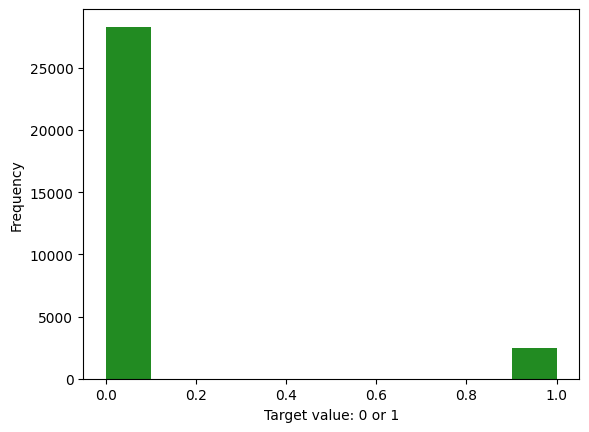

In [7]:
# Target data distribution

application_train['TARGET'].astype(int).plot.hist(color='forestgreen').set_xlabel('Target value: 0 or 1');

count = application_train['TARGET'].value_counts()
num_repaid = count[0]
num_default = count[1]

print("There are {} loans repaid on time (TARGET=0) and {} loans defaulted (TARGET=1) in the dataset".format(num_repaid, num_default))

---

<b> 2.2 Checking missing data </b>

Before we investigate the possible correlations between the features, it is important to check if the data contains missing values.

                index  percentage
0          SK_ID_CURR         0.0
1              TARGET         0.0
2  NAME_CONTRACT_TYPE         0.0
3         CODE_GENDER         0.0
4        FLAG_OWN_CAR         0.0


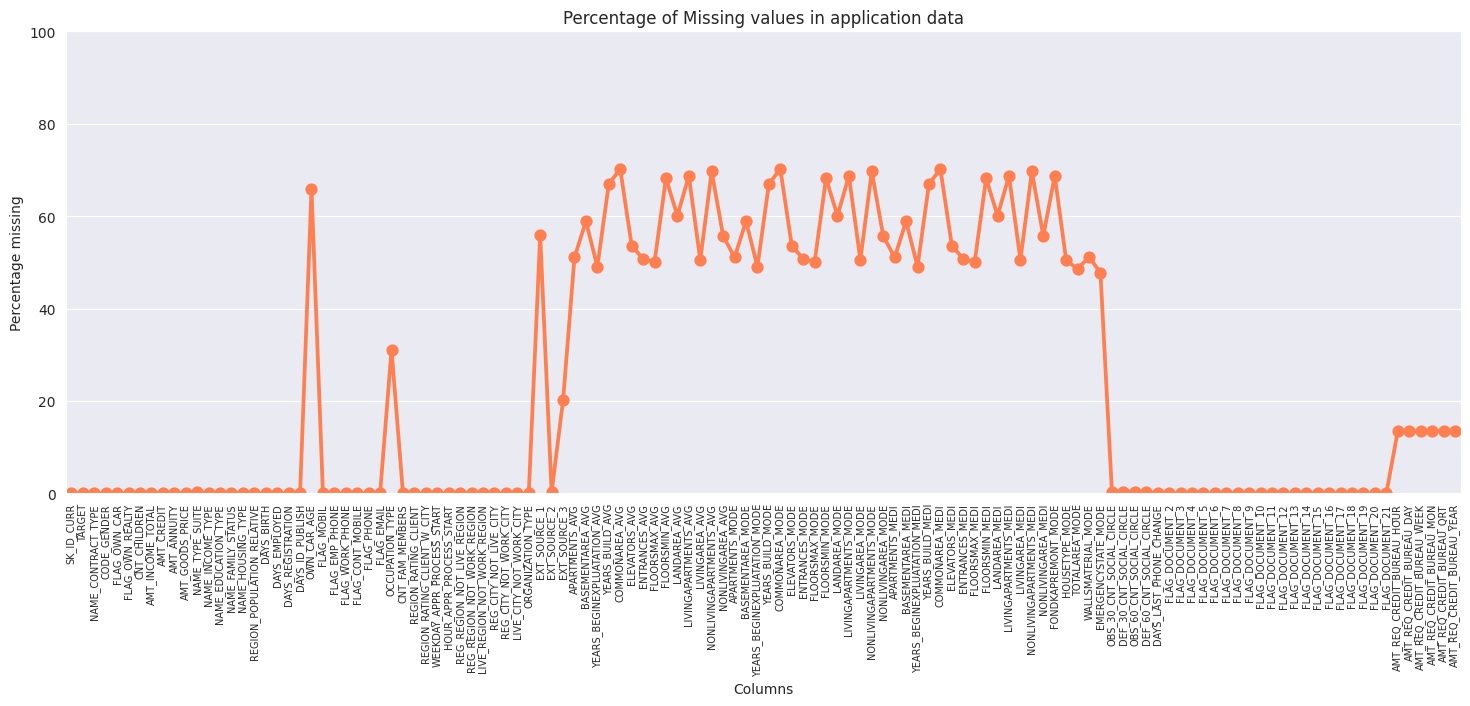

In [8]:
# Missing data in application (main) dataset

fig = plt.figure(figsize=(18,6))
miss_data = pd.DataFrame((application_train.isnull().sum())*100/application_train.shape[0]).reset_index()
miss_data.columns = ['index', 'percentage']
print(miss_data.head())
miss_data["type"] = "application data"

sns.set_style('darkgrid')
ax = sns.pointplot(x="index", y="percentage", data=miss_data, color='coral')
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values in application data")
plt.ylabel("Percentage missing")
plt.xlabel("Columns")
plt.ylim((0, 100))
plt.show()

In the main training dataset, we can see that there are a number of features with missing values almost 50%. The features with missing data need to be discarded or missing values filled before training any model. Similar checks should be performed on the other datasets.

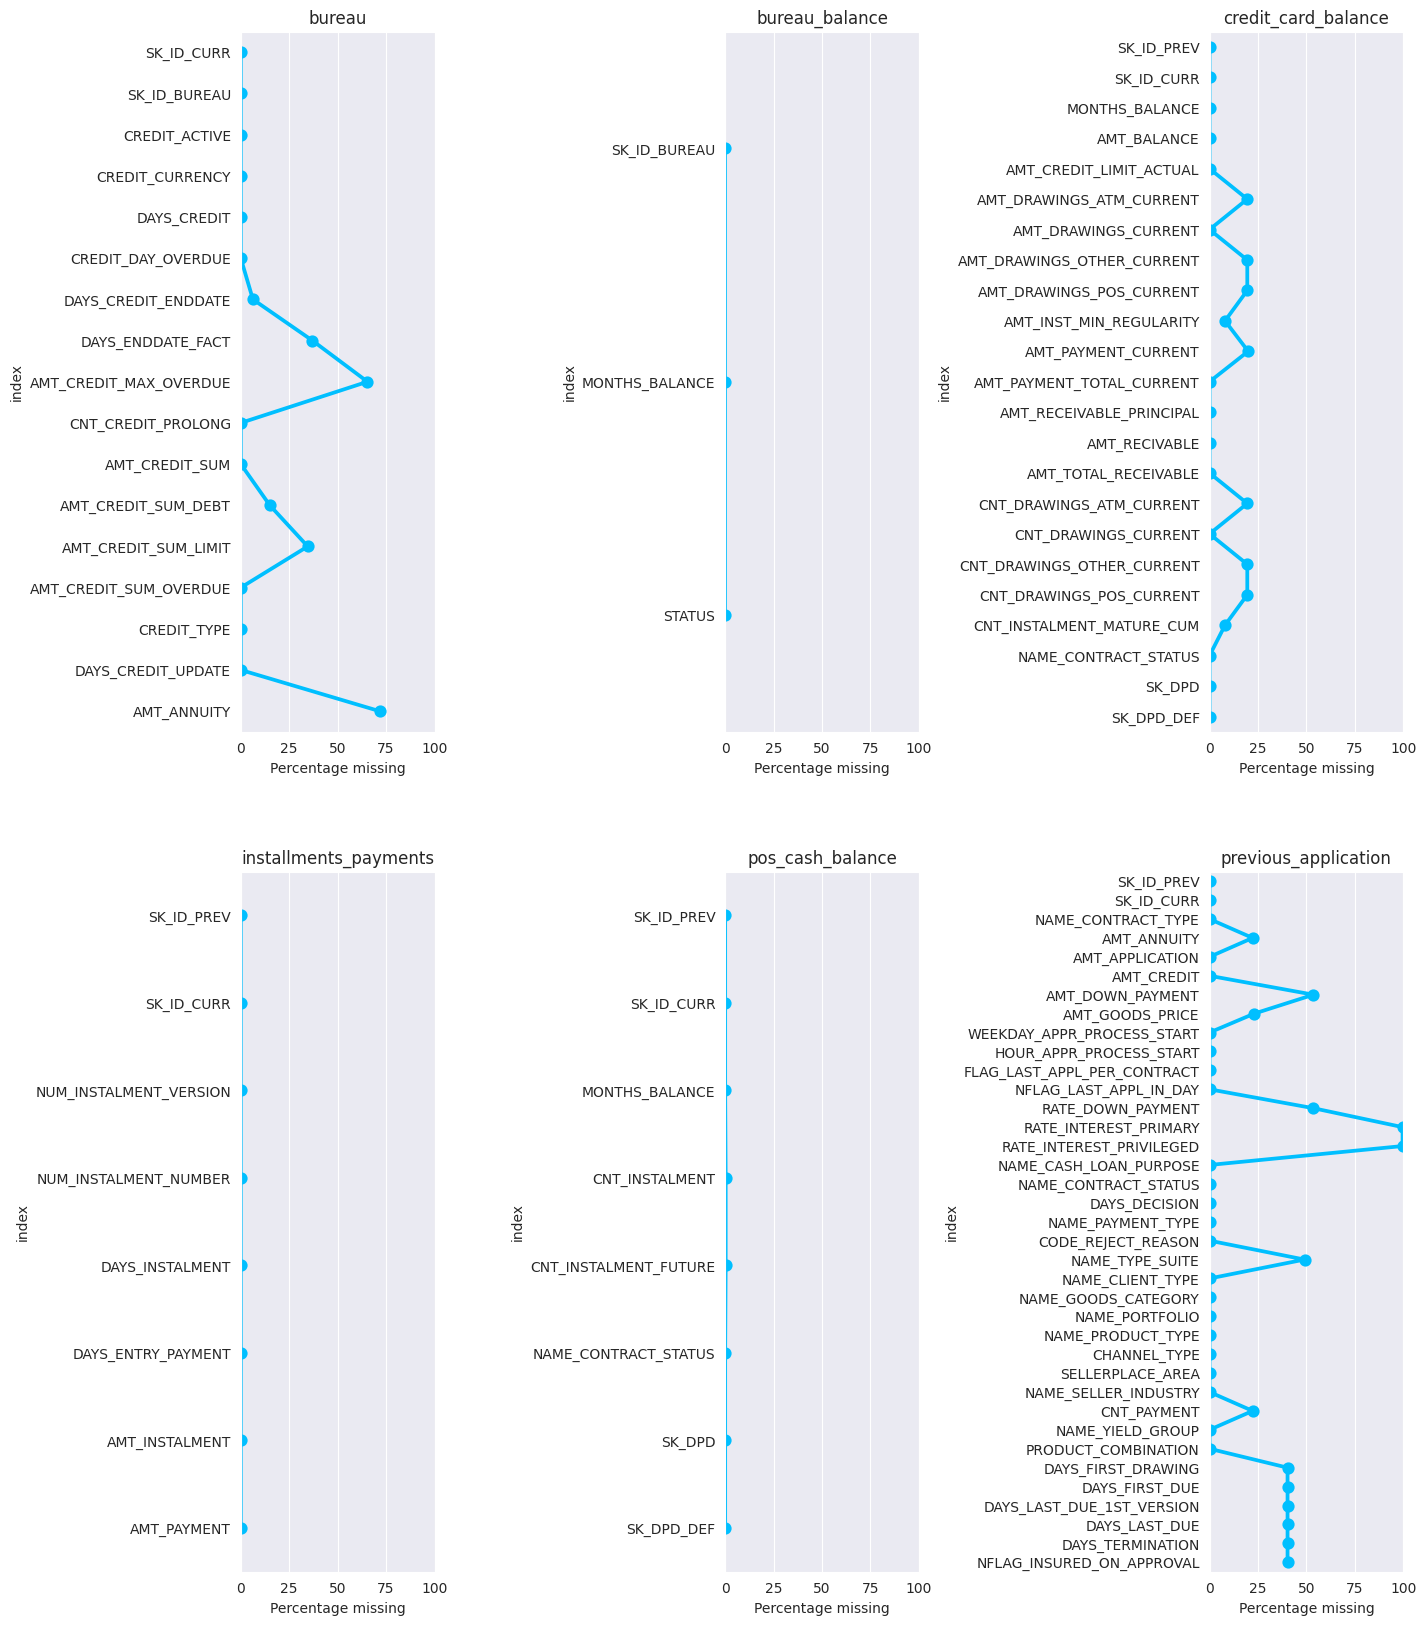

In [9]:
# Missing data in other data

plt.figure(figsize=(15,20))

plt.subplot(231)
bureau_data = pd.DataFrame(bureau.isnull().sum()/bureau.shape[0]*100).reset_index()
bureau_data.columns = ['index', 'percentage']
sns.pointplot(x="percentage", y="index", data=bureau_data, color='deepskyblue')
plt.xlabel("Percentage missing")
plt.xlim((0,100))
plt.title("bureau")

plt.subplot(232)
bureau_balance_data = pd.DataFrame(bureau_balance.isnull().sum()/bureau_balance.shape[0]*100).reset_index()
bureau_balance_data.columns = ['index', 'percentage']
sns.pointplot(x="percentage", y="index", data=bureau_balance_data, color='deepskyblue')
plt.xlabel("Percentage missing")
plt.xlim((0,100))
plt.title("bureau_balance")

plt.subplot(233)
credit_card_balance_data = pd.DataFrame(credit_card_balance.isnull().sum()/credit_card_balance.shape[0]*100).reset_index()
credit_card_balance_data.columns = ['index', 'percentage']
sns.pointplot(x="percentage", y="index", data=credit_card_balance_data, color='deepskyblue')
plt.xlabel("Percentage missing")
plt.xlim((0,100))
plt.title("credit_card_balance")

plt.subplot(234)
installments_payments_data = pd.DataFrame(installments_payments.isnull().sum()/installments_payments.shape[0]*100).reset_index()
installments_payments_data.columns = ['index', 'percentage']
sns.pointplot(x="percentage", y="index", data=installments_payments_data, color='deepskyblue')
plt.xlabel("Percentage missing")
plt.xlim((0,100))
plt.title("installments_payments")

plt.subplot(235)
pos_cash_balance_data = pd.DataFrame(pos_cash_balance.isnull().sum()/pos_cash_balance.shape[0]*100).reset_index()
pos_cash_balance_data.columns = ['index', 'percentage']
sns.pointplot(x="percentage", y="index", data=pos_cash_balance_data, color='deepskyblue')
plt.xlabel("Percentage missing")
plt.xlim((0,100))
plt.title("pos_cash_balance")

plt.subplot(236)
previous_application_data = pd.DataFrame(previous_application.isnull().sum()/previous_application.shape[0]*100).reset_index()
previous_application_data.columns = ['index', 'percentage']
sns.pointplot(x="percentage", y="index", data=previous_application_data, color='deepskyblue')
plt.xlabel("Percentage missing")
plt.xlim((0,100))
plt.title("previous_application")

plt.subplots_adjust(wspace = 1.5)
plt.show()

In the above plots, we can see that while some datasets do not have any missing values, other datasets have significant sample values missing. These need to be addressed before training any models.

---

<b> 2.3 Examine feature correlations and distributions </b>

After inspecting any missing data, we can now continue the exploratory data analysis to see if any response features have significant differences for cases when loans are repaid as opposed to when loans are defaulted.








First create a function to create bar plots for each feature. 
Each figure contains the following- 

A) The total number of categories for each response feature

B) The fraction of each category with loan defaulted

In [10]:
def plot_bar_gen(feature, df = None, orientation_horizontal = True):
    
    if df is None:
        df = application_train
    else:
        df = df
    
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    sns.set_color_codes("colorblind")
    
    if orientation_horizontal == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        s1 = sns.barplot(y = feature, x="Number of contracts",data=df1)
        plt.subplot(122)
        s2 = sns.barplot(y = feature, x='TARGET', data=cat_perc)
        plt.xlabel('Fraction of loans defaulted', fontsize=12)
        plt.ylabel(feature, fontsize=12)
        
    else:
        plt.figure(figsize=(10,18))
        plt.subplot(211)
        s1 = sns.barplot(x = feature, y="Number of contracts",data=df1)
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
        plt.subplot(212)
        s2 = sns.barplot(x = feature, y='TARGET', data=cat_perc)
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
        plt.ylabel('Fraction of loans defaulted', fontsize=12)
        plt.xlabel(feature, fontsize=12)
    
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace = 0.6)
    plt.show();

For the feature, type of contract, we see that there are more cash loans taken than revolving loans and they are also more defaulted.

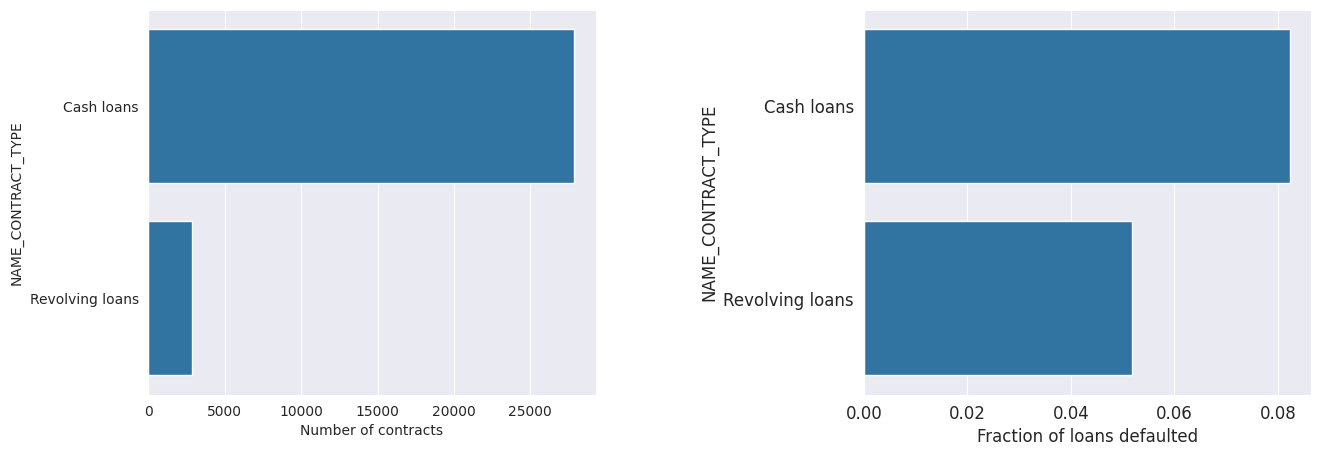

In [11]:
plot_bar_gen('NAME_CONTRACT_TYPE')

For the feature, gender, we see that there are more loans taken by males and they are also more defaulted by them.

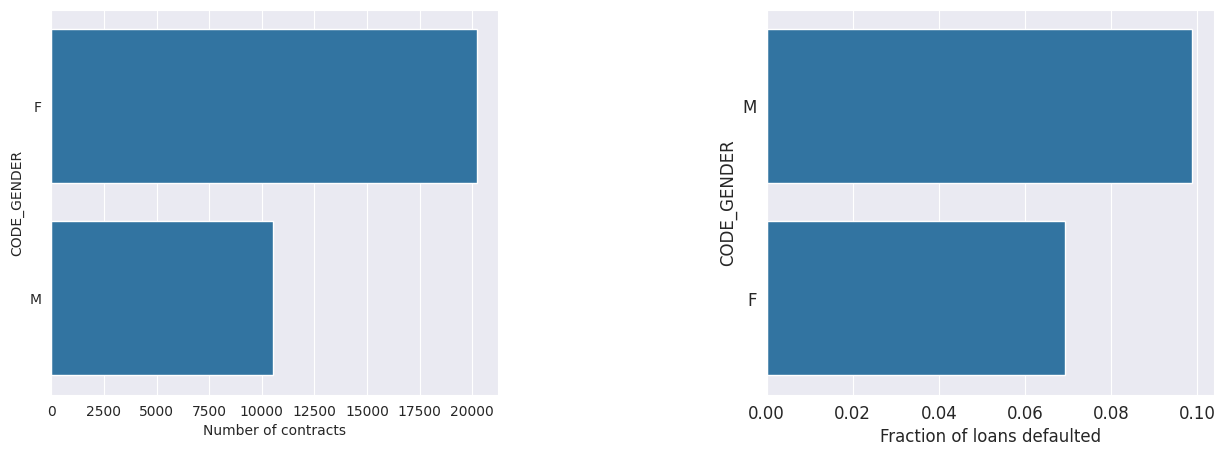

In [12]:
plot_bar_gen('CODE_GENDER')

For the feature, owning car, we see that there are more loans taken by those without car and they are also more defaulted by them.

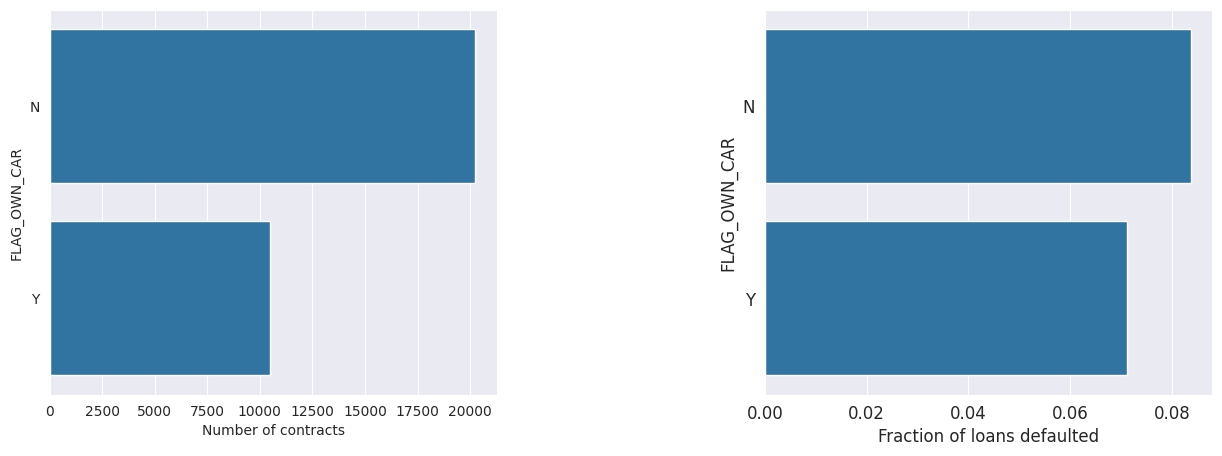

In [13]:
plot_bar_gen('FLAG_OWN_CAR')

For the feature, owning realty, we see that there are more loans taken by those with realty and they are defaulted slightly more by those without realty.

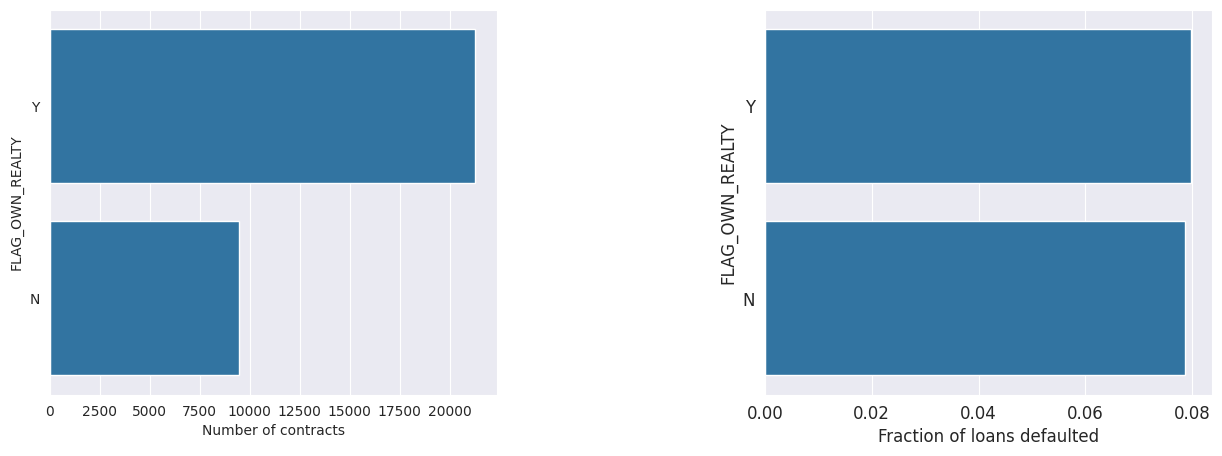

In [14]:
plot_bar_gen('FLAG_OWN_REALTY')

For the feature, family status, we see that there are more loans taken by those who are married and they are more defaulted by those who are in a civil marriage/single

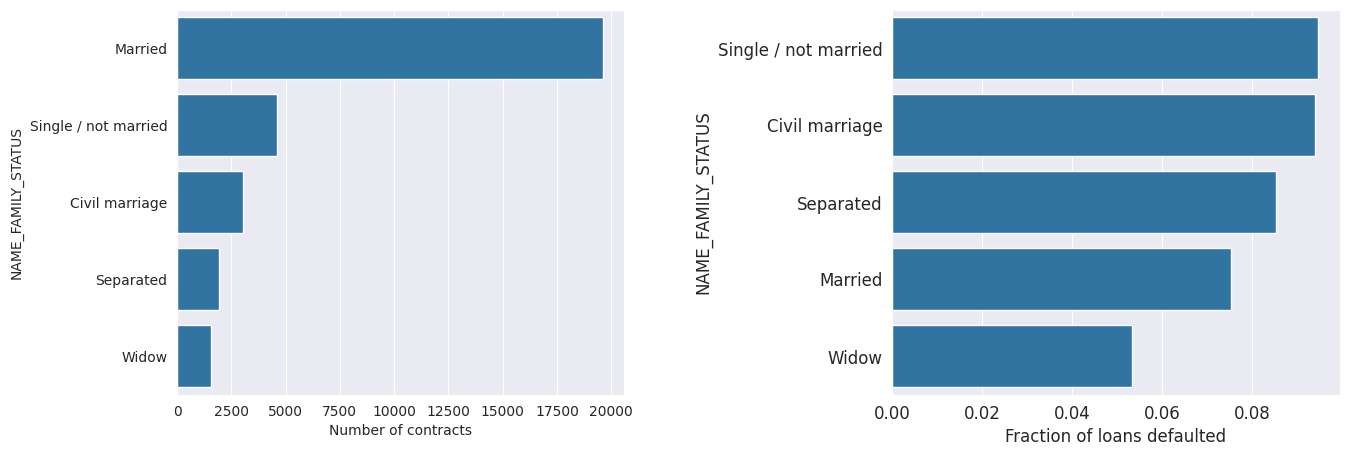

In [15]:
plot_bar_gen('NAME_FAMILY_STATUS')

For the feature, income type, we see that there are more loans taken by those who are working and they are more defaulted by those who are on maternity leave or unemployed

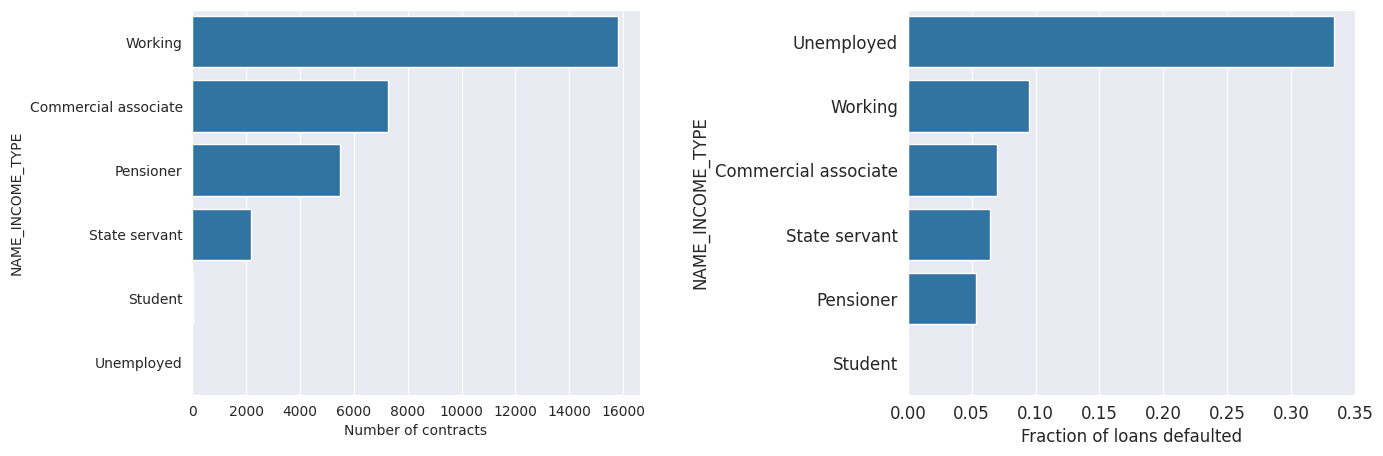

In [16]:
plot_bar_gen('NAME_INCOME_TYPE')

For the feature, children count, we see that there are more loans taken by those who have fewer children and they are more defaulted by those who have more children

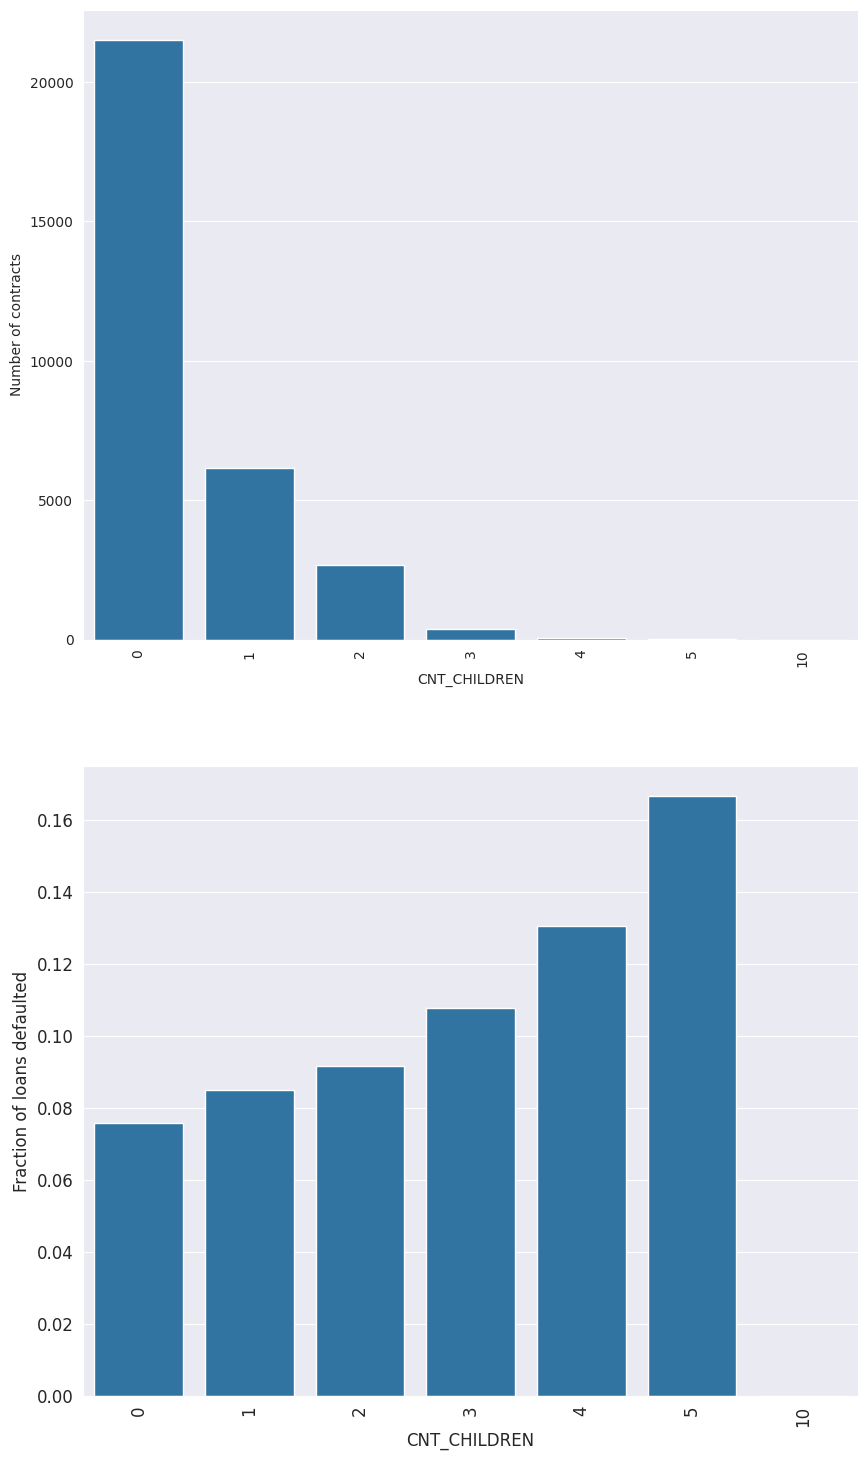

In [17]:
plot_bar_gen('CNT_CHILDREN',None,False)

For the feature, family member count, we see that there are more loans taken by those who have fewer family member and they are more defaulted by those who have more members

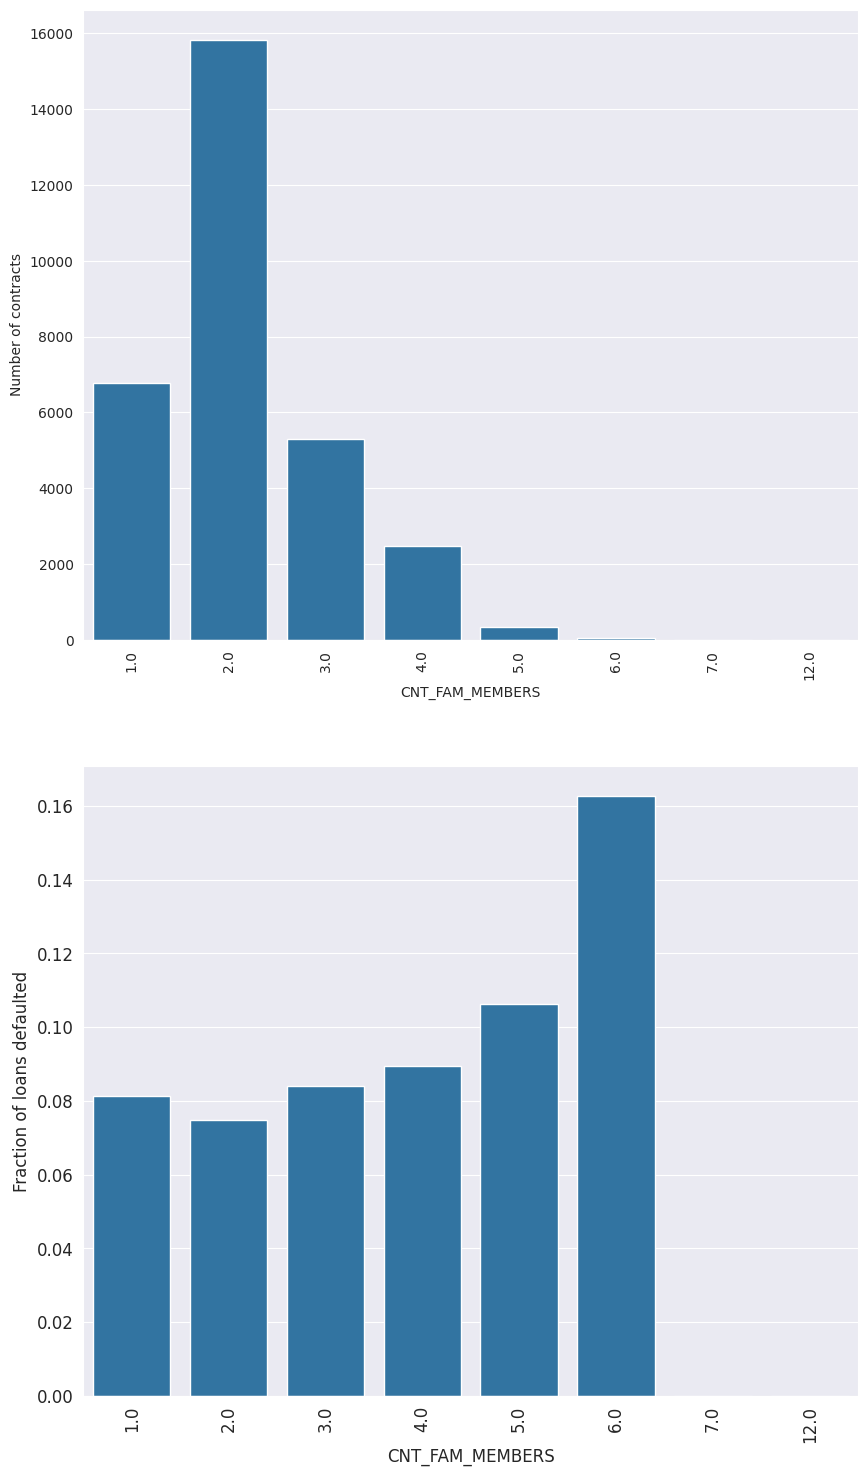

In [18]:
plot_bar_gen('CNT_FAM_MEMBERS',None,False)

For the feature, occupation type, we see that there are more loans taken categories like laborers and they are more defaulted by them too

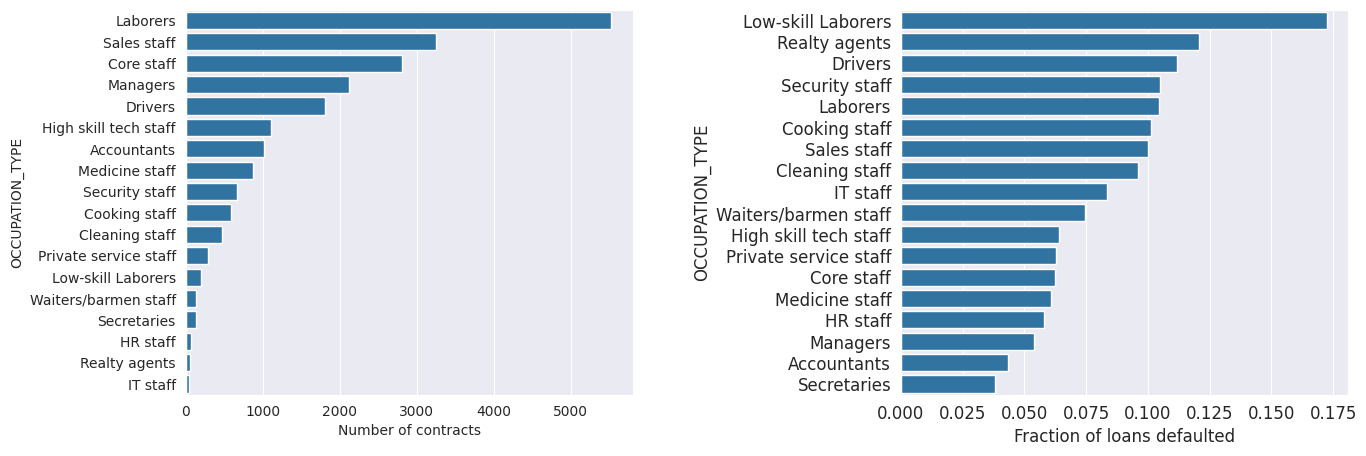

In [19]:
plot_bar_gen('OCCUPATION_TYPE')

For the feature, organization type, we see that there are more loans taken by categories like business entities, self-employed,and miscellaneous groups not categorized. They are more defaulted by those in certain industries

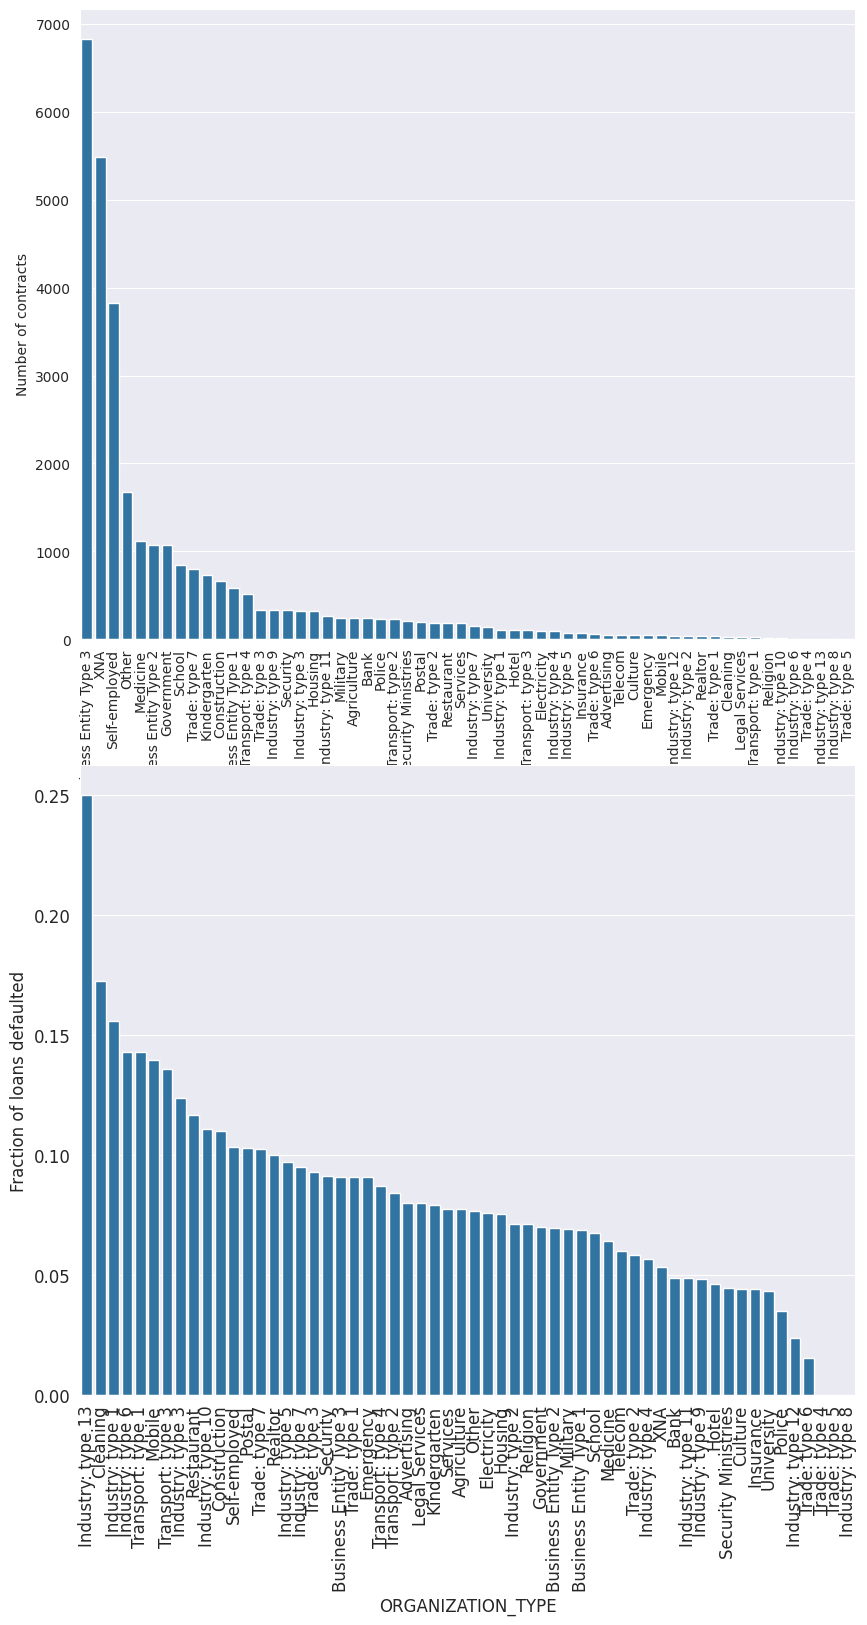

In [20]:
plot_bar_gen('ORGANIZATION_TYPE',None,False)

For the feature, education type, we see that there are more loans taken by those with secondary education and they are more defaulted by those who have less education

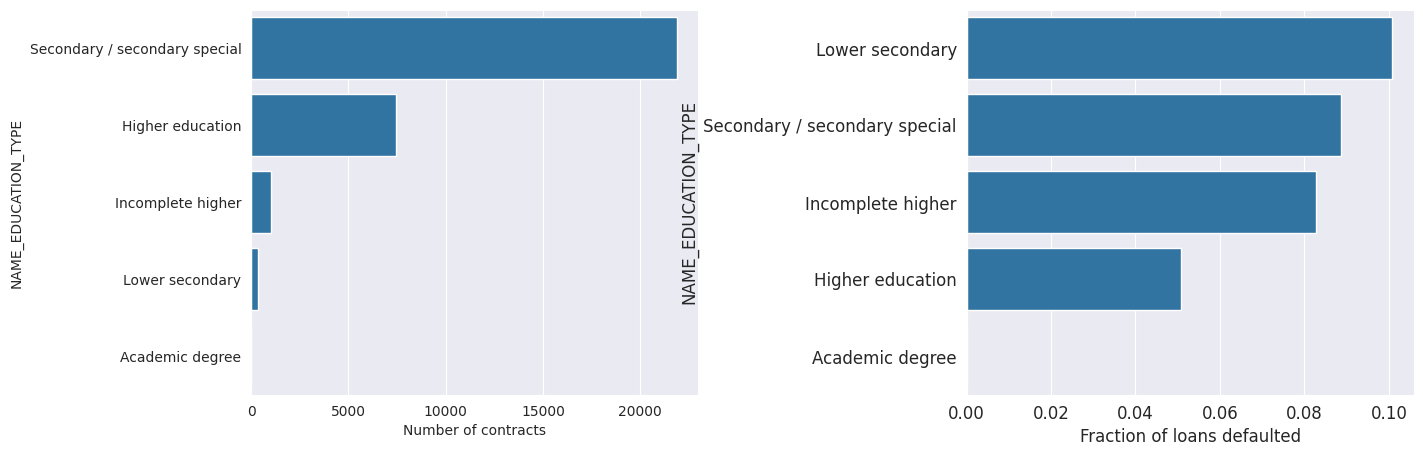

In [21]:
plot_bar_gen('NAME_EDUCATION_TYPE')

For the feature, housing type, we see that there are more loans taken by those with a house/apartment and they are more defaulted by those who have rented apartment or live with parents

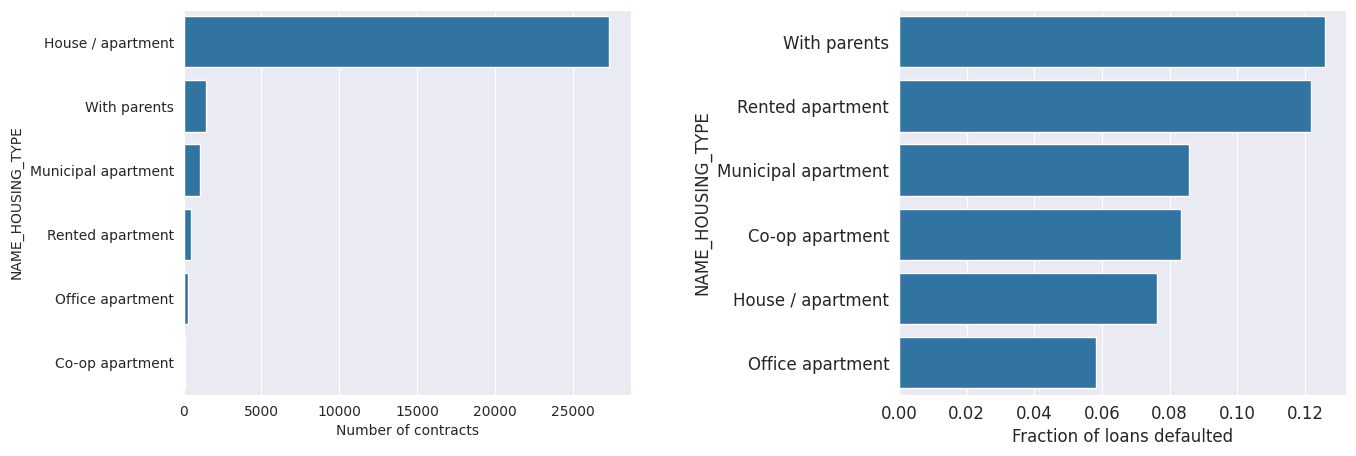

In [22]:
plot_bar_gen('NAME_HOUSING_TYPE')

For the feature, region not living region, we see that there are more loans are taken by those living in same region (0) and they are more defaulted by those who don't live in same region

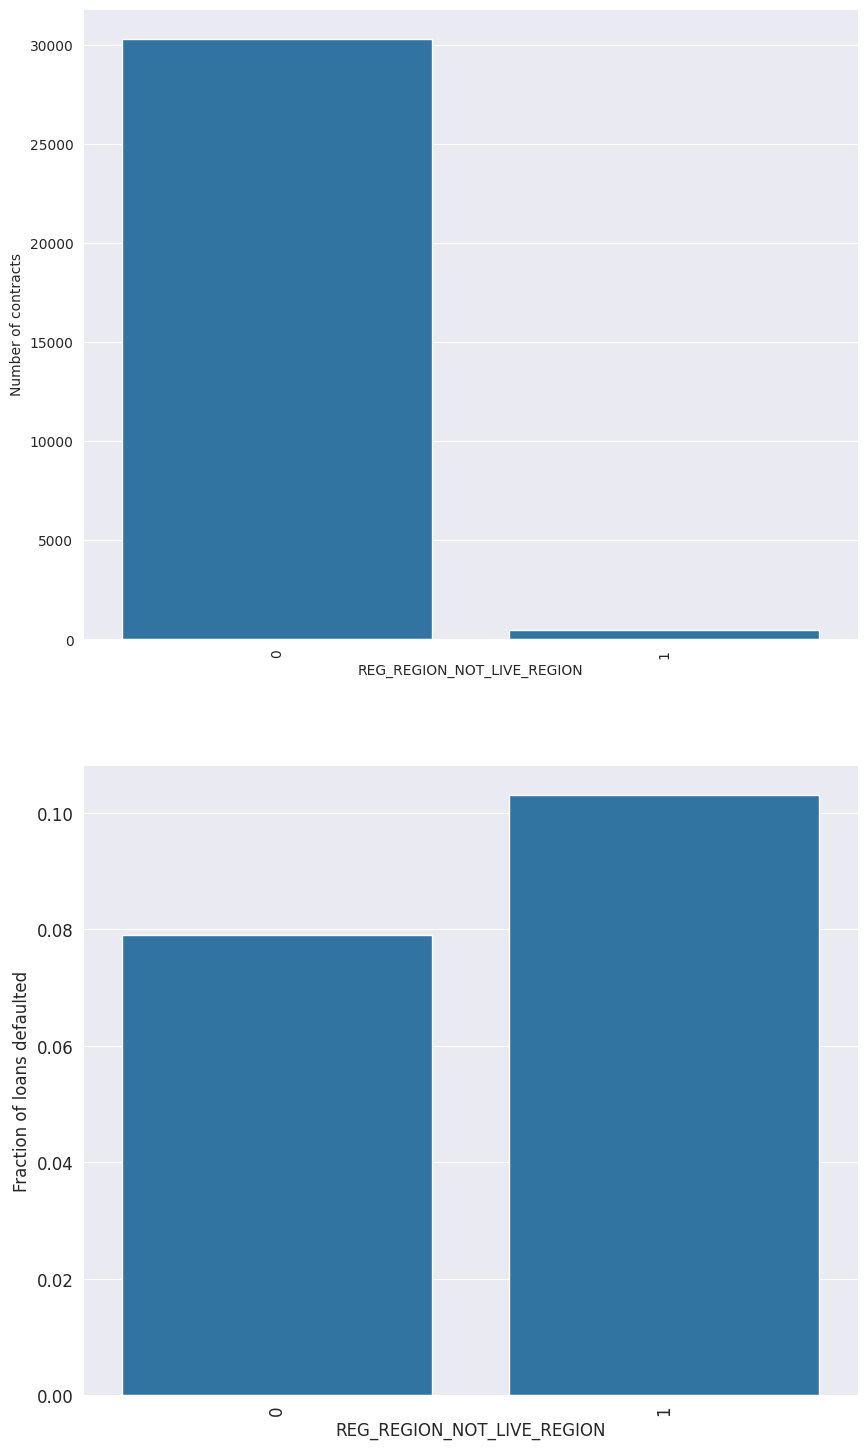

In [23]:
plot_bar_gen('REG_REGION_NOT_LIVE_REGION',None,False)

For the feature, region not work region, we see that there are more loans are taken by those working in same region (0) and they are more defaulted by those who don't work in same region

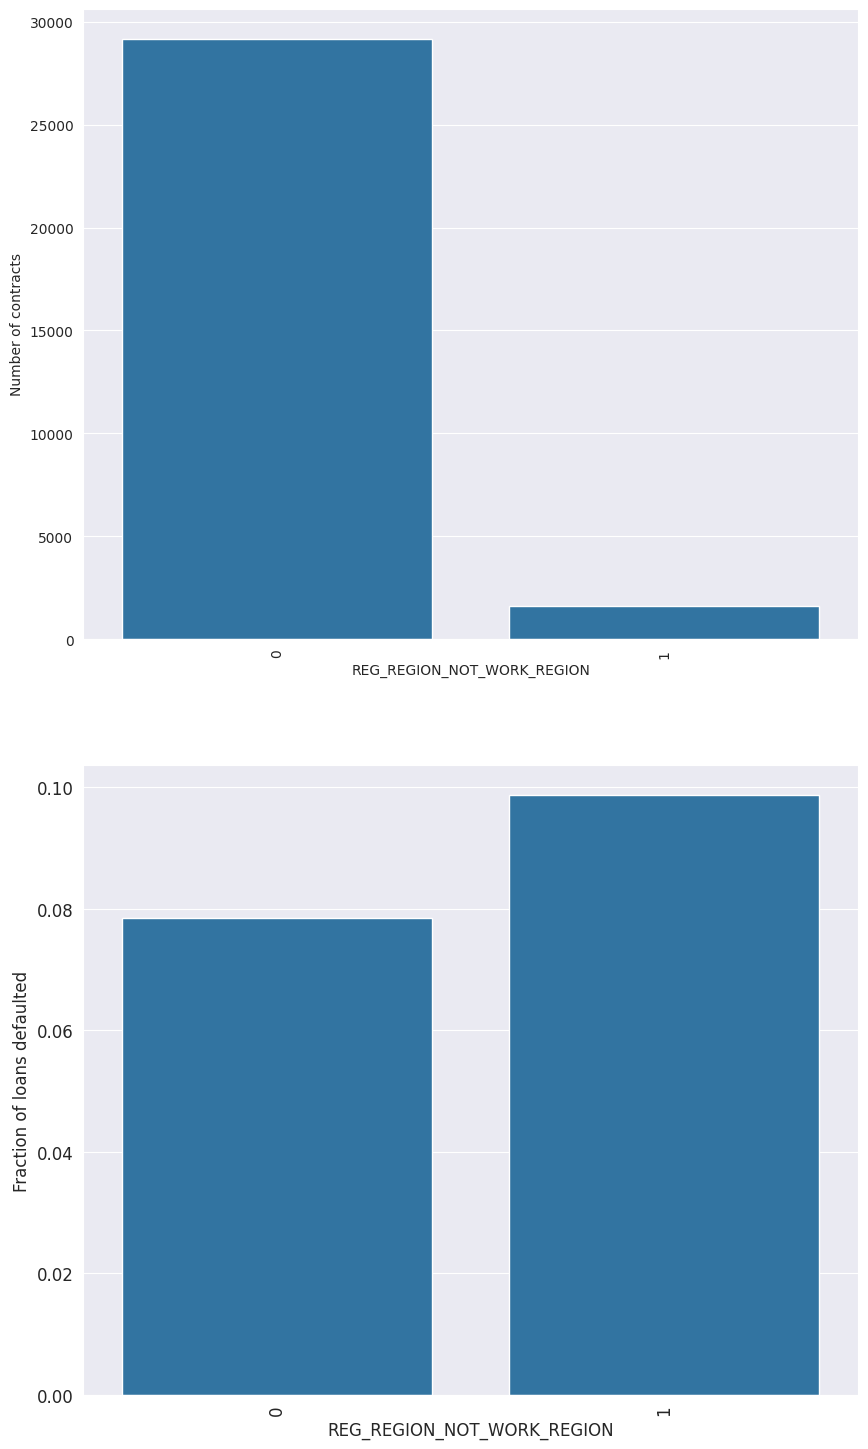

In [24]:
plot_bar_gen('REG_REGION_NOT_WORK_REGION',None,False)

For the feature, city not living city, we see that there are more loans are taken by those living in same city (0) and they are more defaulted by those who don't live in same city

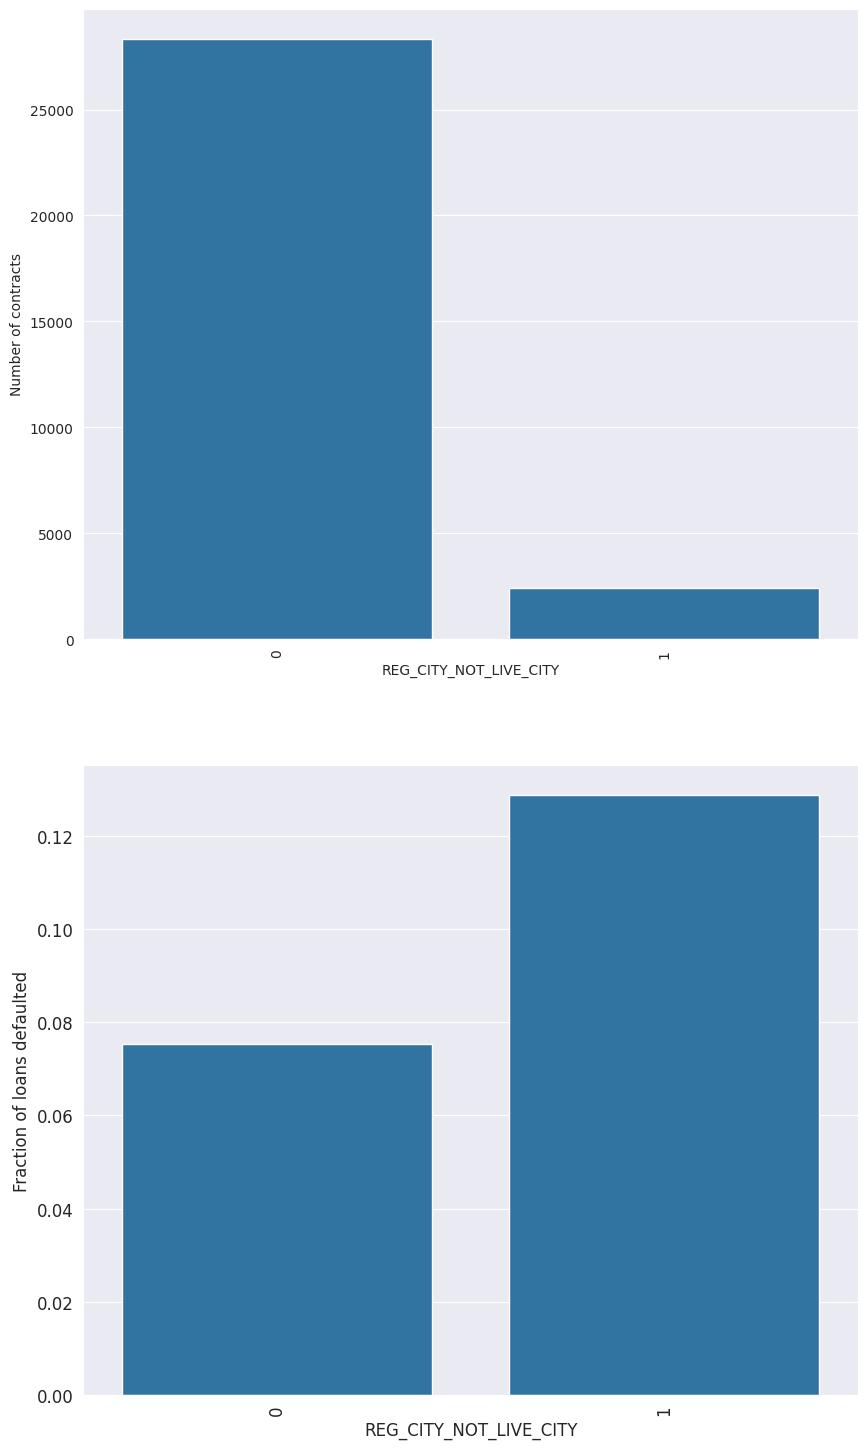

In [25]:
plot_bar_gen('REG_CITY_NOT_LIVE_CITY',None,False)

For the feature, city not working city, we see that there are more loans are taken by those working in same city (0) and they are more defaulted by those who don't work in same city

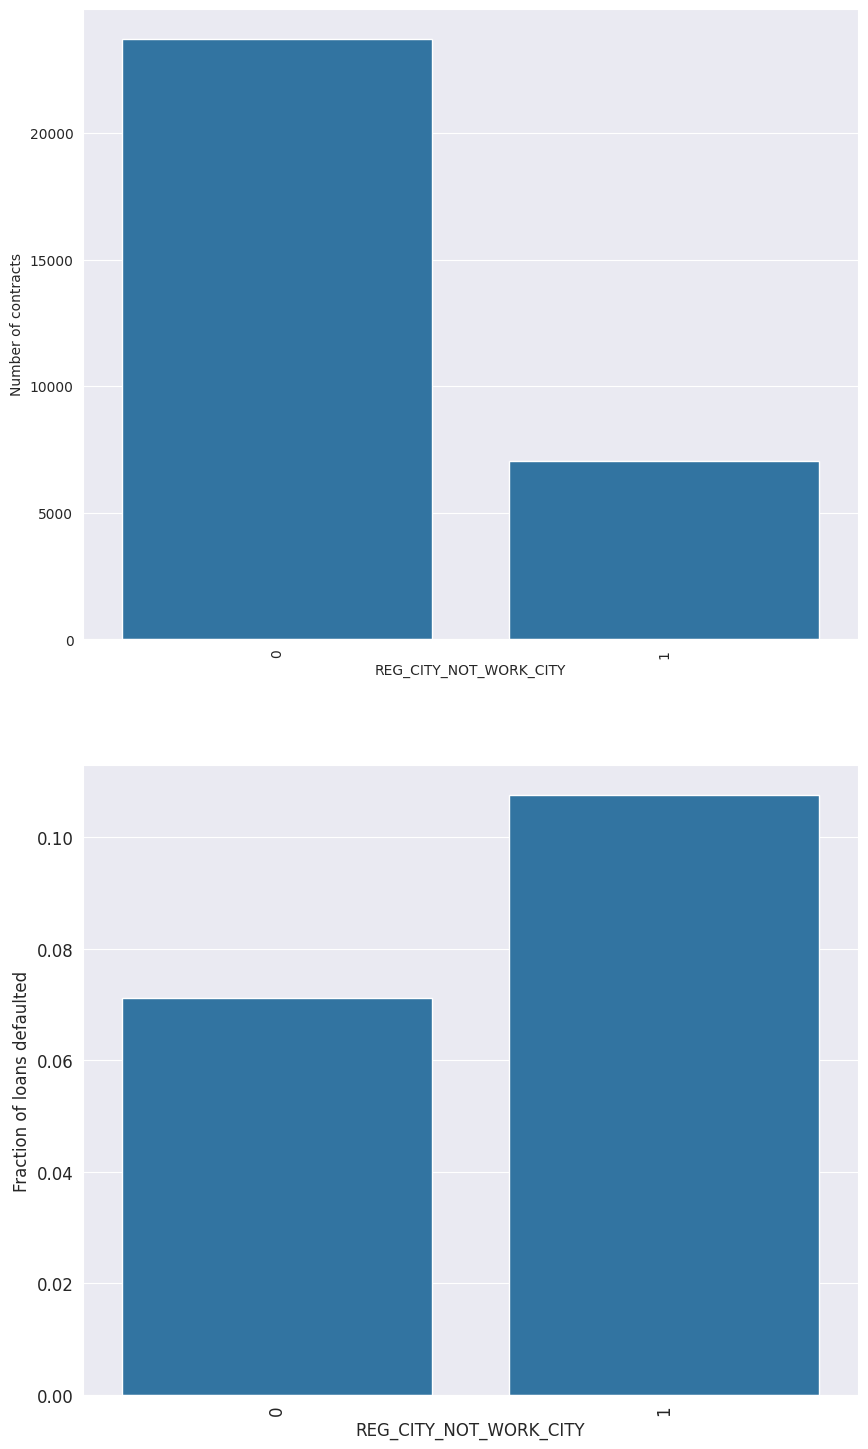

In [26]:
plot_bar_gen('REG_CITY_NOT_WORK_CITY',None,False)

For non-categorical features, we can plot bivariate distributions (with TARGET) to see if there is difference when loan is repaid or defaulted

In [27]:
# Plot distribution of one feature with or without paid/default shown separately

def plot_distribution_gen(feature,df=None,separate_target=False):
    if df is None:
        df = application_train
    else:
        df = df
        
    if separate_target == False:
        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.distplot(df[feature].dropna(),color='red', kde=True,bins=100)
    else:
        t1 = df.loc[df['TARGET'] != 0]
        t0 = df.loc[df['TARGET'] == 0]
        
        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.set_style('whitegrid')
#         sns.kdeplot(t1[feature], bw=0.5,label="Loan defaulted (TARGET=1)")
#         sns.kdeplot(t0[feature], bw=0.5,label="Loan repaid (TARGET = 0)")
        
        sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label = 'target == 0')
        sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label = 'target == 1')
    
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.legend(loc="best", labels=['Loan repaid (TARGET=0)', 'Loan defaulted (TARGET=1)'])
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

The function below can be used to identify outliers in the data distribution

In [28]:
def get_thresh(feature):
    """ Outliers are usually > 3 standard deviations away from the mean. """
    ave=np.mean(application_train[feature])
    sdev=np.std(application_train[feature])
    threshold=round(ave+(3*sdev),2)
    print('Threshold for',feature,':',threshold)
    return threshold

For the feature, days employed, we see that there is an issue in the data with outliers with days employed more than 350000 days (958 years) ! This needs to be corrected

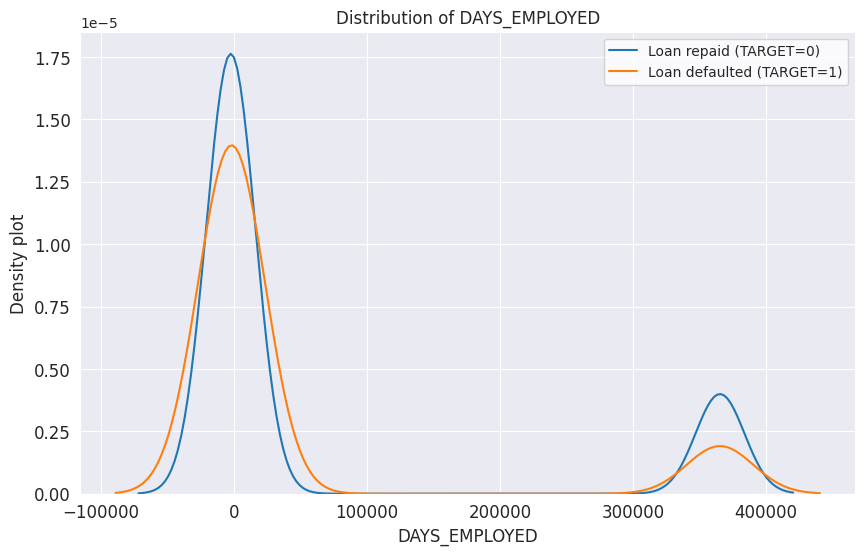

In [29]:
plot_distribution_gen('DAYS_EMPLOYED',None,True)

For the feature, amount income total, we see that there is an issue in the data, possibly due to outliers. This needs to be corrected

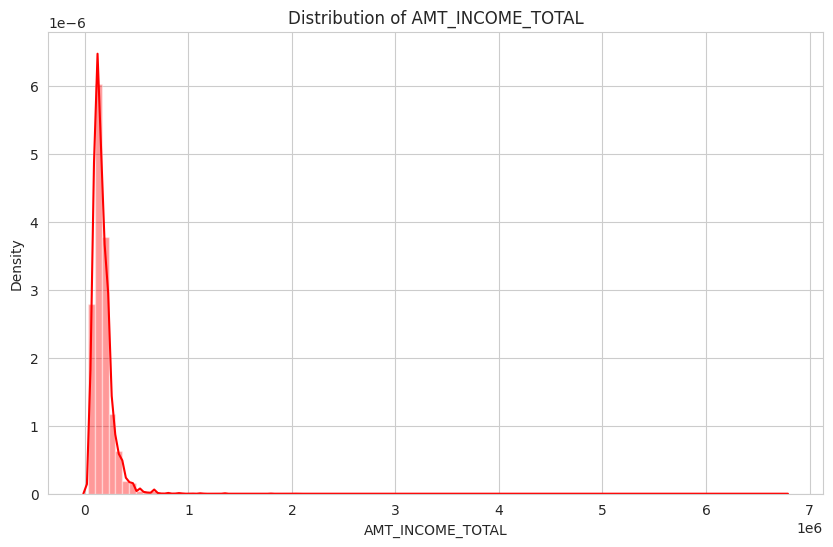

In [30]:
plot_distribution_gen('AMT_INCOME_TOTAL')

We can find the thresholds for outliers for the days employed and total income features, and replace the anomalous values with NaN

In [31]:
thresh_income = get_thresh('AMT_INCOME_TOTAL')
thresh_employment = get_thresh('DAYS_EMPLOYED')

anomalous_employment = application_train[application_train['DAYS_EMPLOYED'] > 0]
normal_employment = application_train[application_train['DAYS_EMPLOYED'] < 0]

print('The non-anomalies default on %0.2f%% of loans' % (100 * normal_employment['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anomalous_employment['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anomalous_employment))

Threshold for AMT_INCOME_TOTAL : 494665.16
Threshold for DAYS_EMPLOYED : 485533.59
The non-anomalies default on 8.51% of loans
The anomalies default on 5.34% of loans
There are 5487 anomalous days of employment


In [32]:
# Replace the anomalous values with nan

application_train['DAYS_EMPLOYED'].mask(application_train['DAYS_EMPLOYED'] > 0, inplace=True)
application_train['AMT_INCOME_TOTAL'].mask(application_train['AMT_INCOME_TOTAL'] > thresh_income, inplace=True)

The below function can be used to convert features which have days to years. The function can then be applied on all such features

In [33]:
def create_day_to_year(df,ls_cols,newcol):
    df[newcol] = round(np.abs(df[ls_cols[0]]/365))
    df.drop(columns=ls_cols,inplace=True);
    return df

For the feature, AGE, we can see that there are more number of loans defaulted by younger people

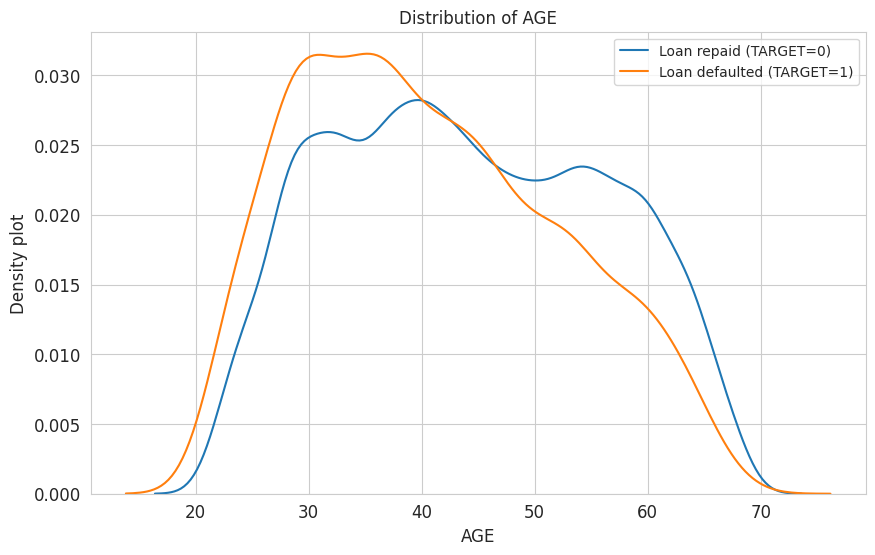

In [34]:
create_day_to_year(application_train,['DAYS_BIRTH'],'AGE');
plot_distribution_gen('AGE',None,True)

For the feature, YEARS_EMPLOYED, we can see that there are more number of loans defaulted by people who are employed for fewer years

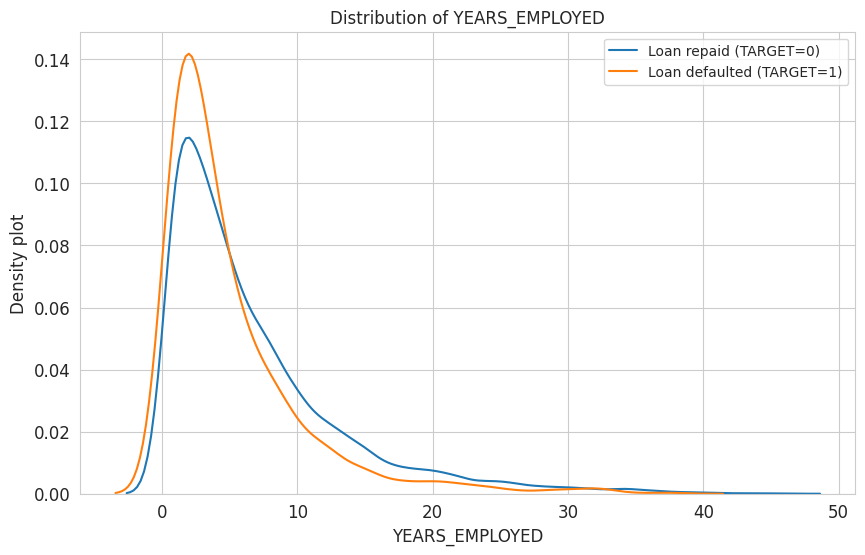

In [35]:
create_day_to_year(application_train,['DAYS_EMPLOYED'],'YEARS_EMPLOYED');
plot_distribution_gen('YEARS_EMPLOYED',None,True)

Now we can revisit the total income feature after removing outliers and we see the minor differences in distributions when loans are repaid or defaulted.

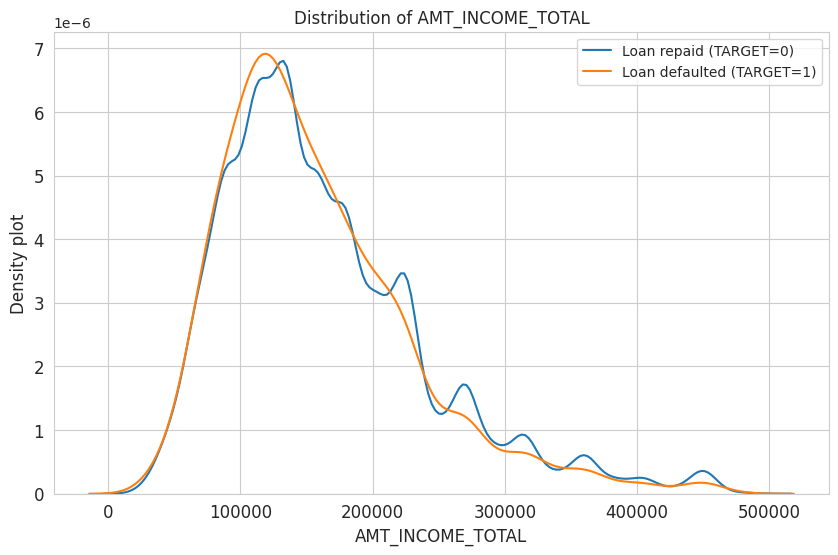

In [36]:
plot_distribution_gen('AMT_INCOME_TOTAL',None,True)

For the feature, EXT_SOURCE_1, we can see that as value of EXT_SOURCE_1 increases, the probability of loan being repaid also increases.

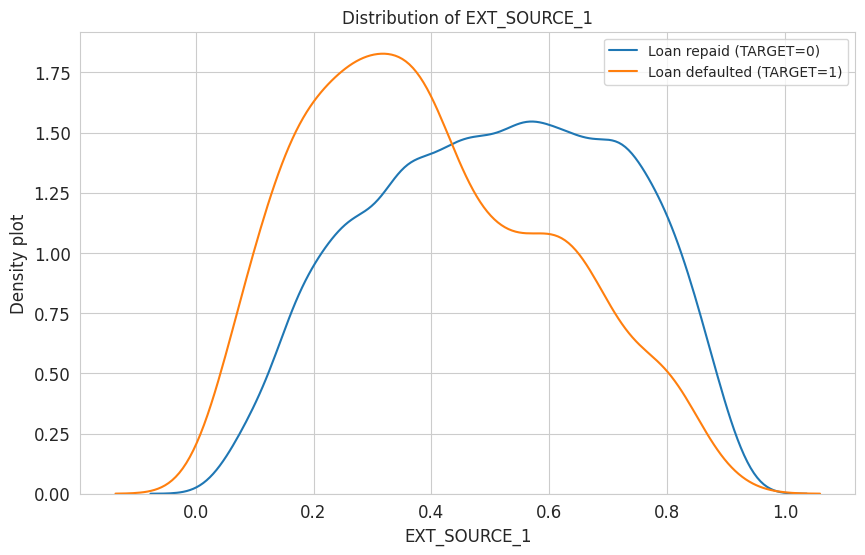

In [37]:
plot_distribution_gen('EXT_SOURCE_1',None,True)

For the feature, EXT_SOURCE_2, we can see that as value of EXT_SOURCE_2 increases, the probability of loan being repaid also increases.

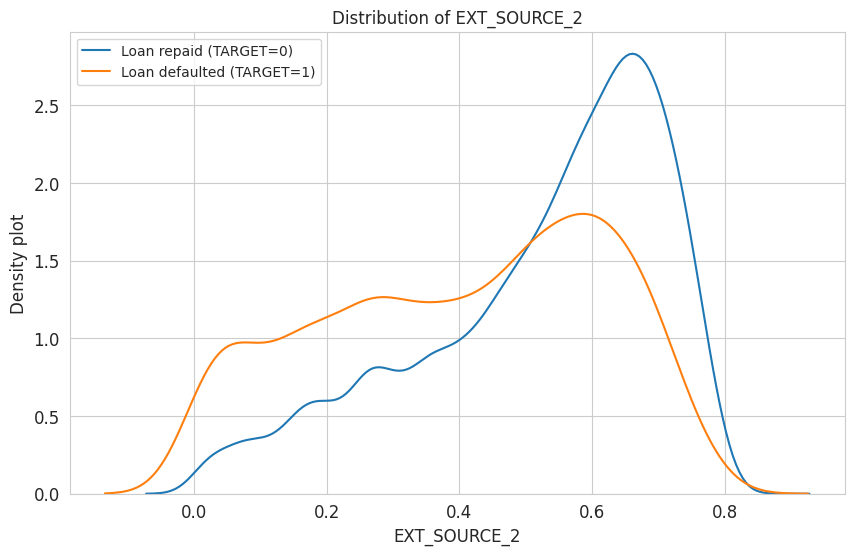

In [38]:
plot_distribution_gen('EXT_SOURCE_2',None,True)

For the feature, EXT_SOURCE_3, we can see that as value of EXT_SOURCE_3 increases, the probability of loan being repaid also increases.

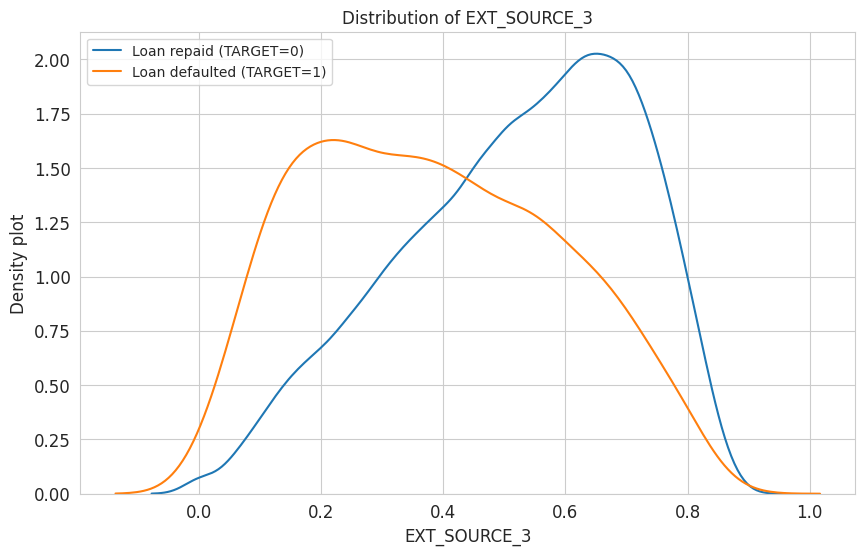

In [39]:
plot_distribution_gen('EXT_SOURCE_3',None,True)

All the features related to amount ('AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE') can be plotted along with TARGET as a heatmap to see if there are any possible correlations. We see in most cases that the repaid loans (TARGET = 0) have higher values.

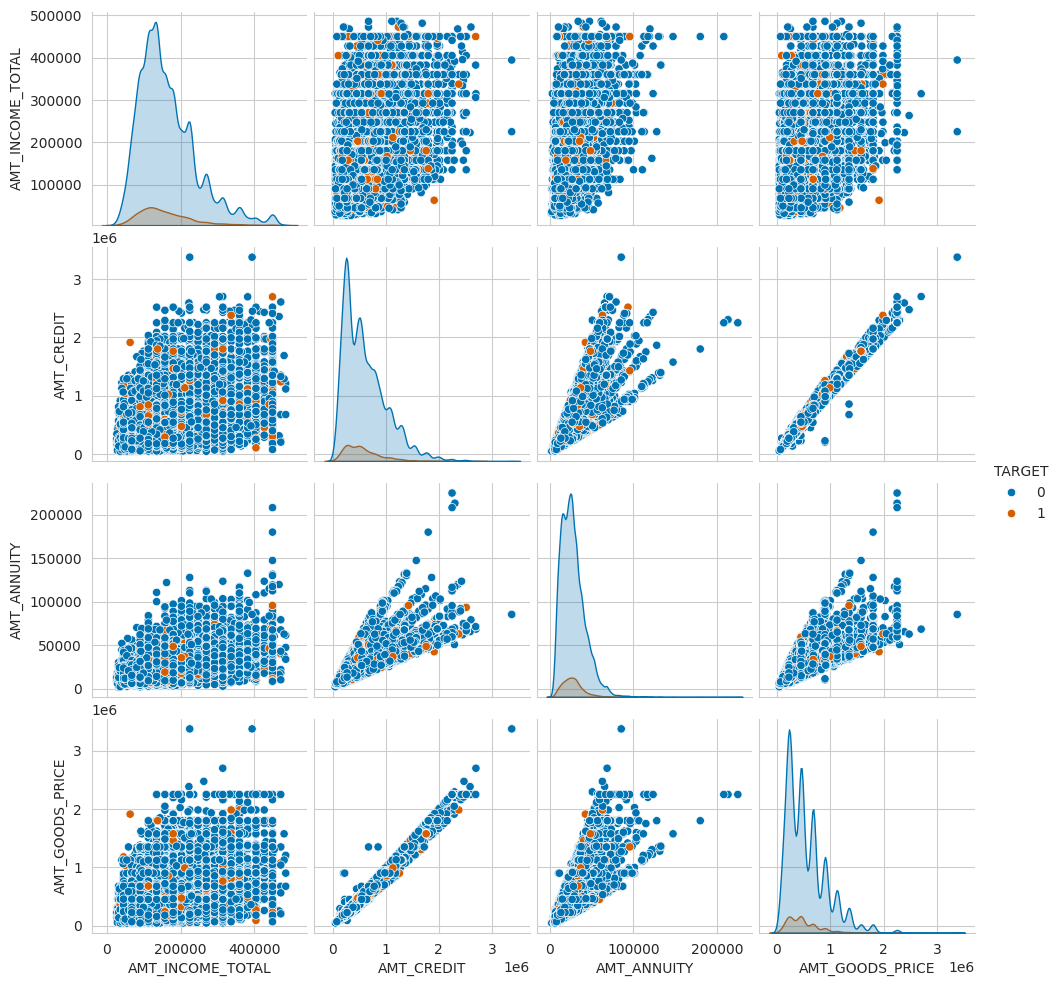

In [40]:
amt = application_train[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
g = sns.pairplot(amt,hue="TARGET",palette=["b","r"])  

plt.show()

For the feature, YEARS_REGISTRATION, we can see that there are more number of loans defaulted for lower number of years

In [41]:
create_day_to_year(application_train,['DAYS_REGISTRATION'],'YEARS_REGISTRATION');

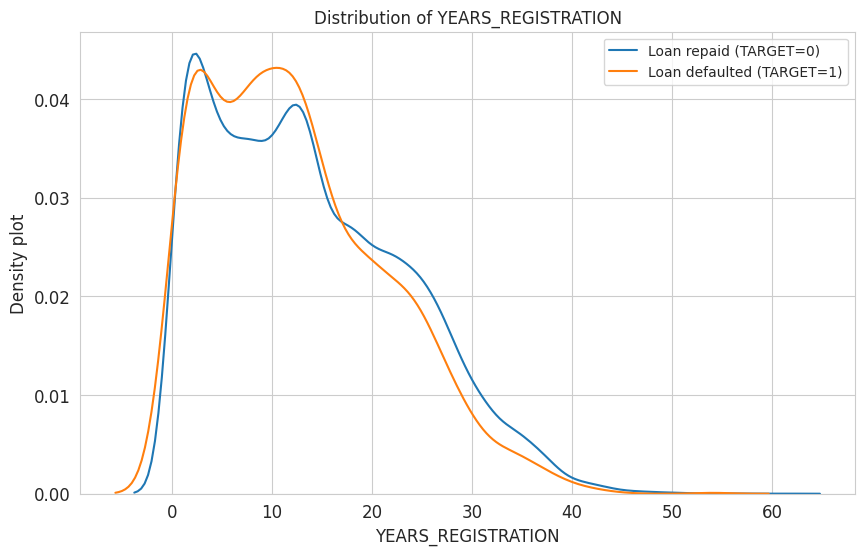

In [42]:
plot_distribution_gen('YEARS_REGISTRATION',None,True)

For the feature, YEARS_ID_PUBLISH, we can see that there are more number of loans defaulted for lower number of years

In [43]:
create_day_to_year(application_train,['DAYS_ID_PUBLISH'],'YEARS_ID_PUBLISH');

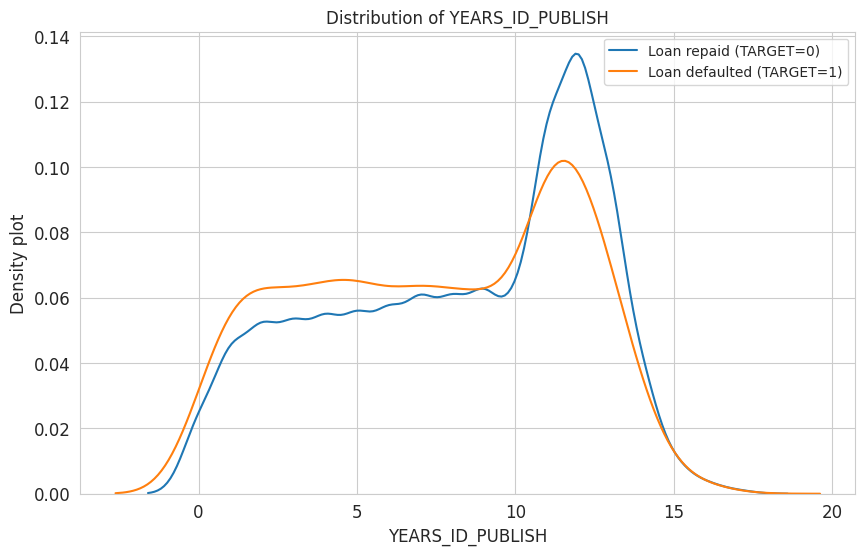

In [44]:
plot_distribution_gen('YEARS_ID_PUBLISH',None,True)

The below function can create income bands for the individuals using income ranges from income total

In [45]:
# Create INCOME_BAND to group individuals per income range

def create_income_band(df):
    df.loc[(df.AMT_INCOME_TOTAL < 30000),'INCOME_BAND'] = 1
    df.loc[(df.AMT_INCOME_TOTAL >= 30000)&(df.AMT_INCOME_TOTAL < 65000),'INCOME_BAND'] = 2
    df.loc[(df.AMT_INCOME_TOTAL >= 65000)&(df.AMT_INCOME_TOTAL < 95000),'INCOME_BAND'] = 3
    df.loc[(df.AMT_INCOME_TOTAL >= 95000)&(df.AMT_INCOME_TOTAL < 130000),'INCOME_BAND'] = 4
    df.loc[(df.AMT_INCOME_TOTAL >= 130000)&(df.AMT_INCOME_TOTAL < 160000),'INCOME_BAND'] = 5
    df.loc[(df.AMT_INCOME_TOTAL >= 160000)&(df.AMT_INCOME_TOTAL < 190000),'INCOME_BAND'] = 6
    df.loc[(df.AMT_INCOME_TOTAL >= 190000)&(df.AMT_INCOME_TOTAL < 220000),'INCOME_BAND'] = 7
    df.loc[(df.AMT_INCOME_TOTAL >= 220000)&(df.AMT_INCOME_TOTAL < 275000),'INCOME_BAND'] = 8
    df.loc[(df.AMT_INCOME_TOTAL >= 275000)&(df.AMT_INCOME_TOTAL < 325000),'INCOME_BAND'] = 9
    df.loc[(df.AMT_INCOME_TOTAL >= 325000),'INCOME_BAND'] = 10
    return df

In [46]:
create_income_band(application_train);

Observing the income bands for those with defaulting loans vs those with repaid loans, we do not see any major differences, but the distribution of repaid loans slightly increases for higher income bands. 

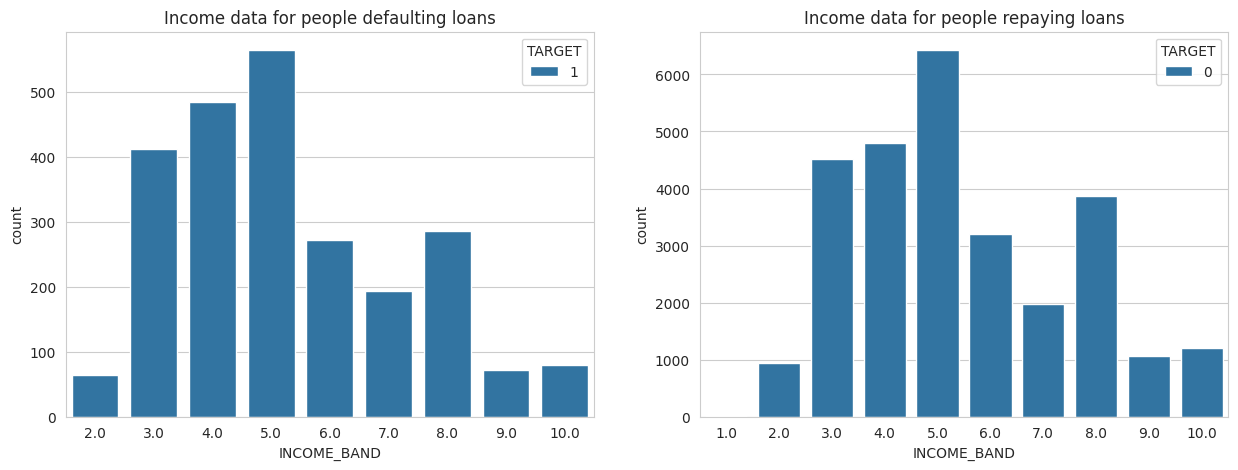

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data=application_train[application_train.TARGET==1],x='INCOME_BAND',hue='TARGET').set_title('Income data for people defaulting loans')
plt.subplot(122)
sns.countplot(data=application_train[application_train.TARGET==0],x='INCOME_BAND',hue='TARGET').set_title('Income data for people repaying loans')
application_train.drop(columns=['INCOME_BAND'],inplace=True);

---

The exploratory data analysis can be continued into other datasets. For example, in the dataset, bureau, the feature distributions can be seen below

In [48]:
application_bureau_train = application_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [49]:
print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ", 
      application_bureau_train.shape[1]," columns.")

The resulting dataframe `application_bureau_train` has  14628  rows and  138  columns.


For the feature, CREDIT_ACTIVE, we see that there are more loans taken by those without active credit and they are more defaulted by those who have bad debt or sold credit

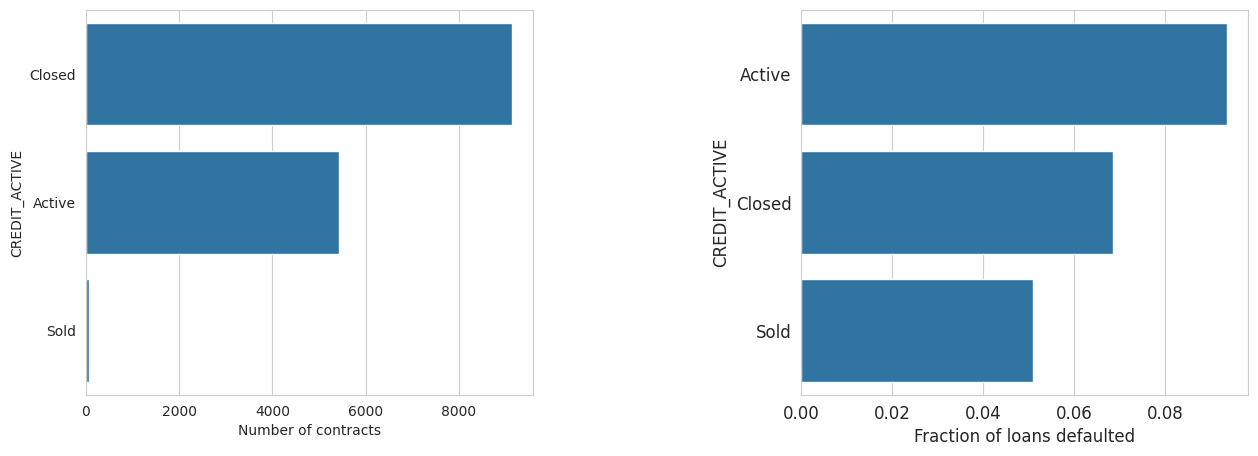

In [50]:
plot_bar_gen('CREDIT_ACTIVE',application_bureau_train)

For the feature, CREDIT_CURRENCY, we see that there are most loans taken by those using currency 1 and they are more defaulted by those who use currency 3

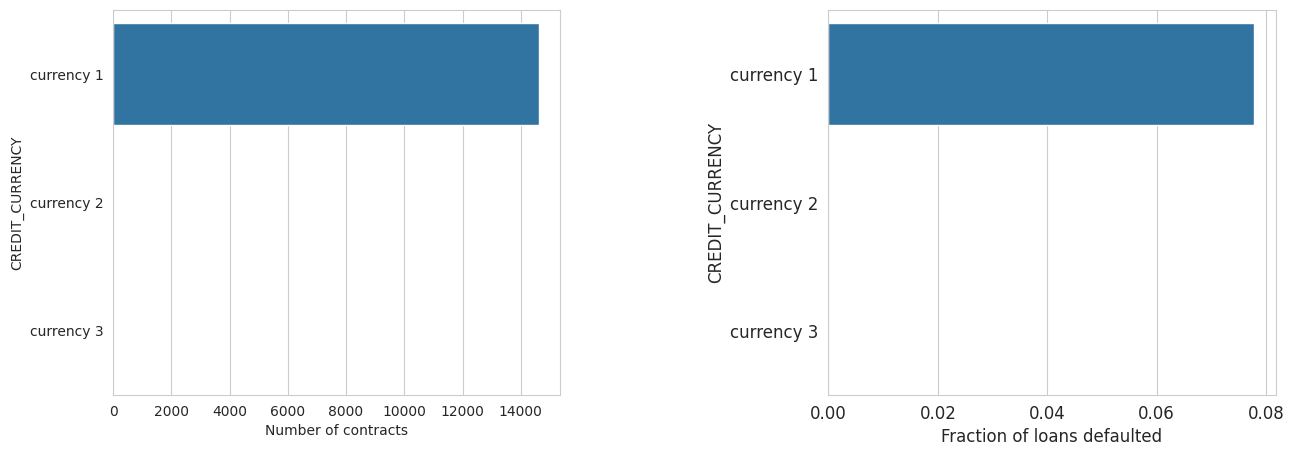

In [51]:
plot_bar_gen('CREDIT_CURRENCY',application_bureau_train)

For the feature, CREDIT_TYPE, we see that there are most loans taken by those with consumer credit/credit card and they are more defaulted by those who use loans for equipment purchase or microloans

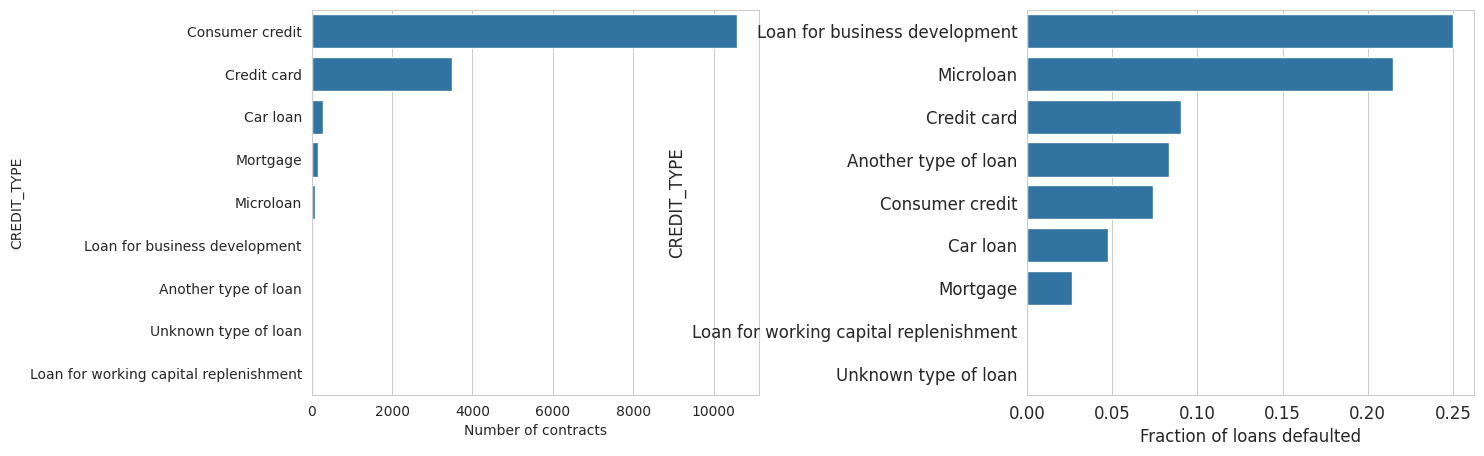

In [52]:
plot_bar_gen('CREDIT_TYPE',application_bureau_train)

---

Continuing the analysis for the dataset, previous_application, the feature distributions can be seen below

In [53]:
application_prev_train = application_train.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [54]:
print("The resulting dataframe `application_prev_train` has ",application_prev_train.shape[0]," rows and ", 
      application_prev_train.shape[1]," columns.")

The resulting dataframe `application_prev_train` has  14163  rows and  158  columns.


For the feature, NAME_CONTRACT_TYPE, we see that there are almost equal previous cash/consumer loans and they are more defaulted by those whose info is not-available (XNA)

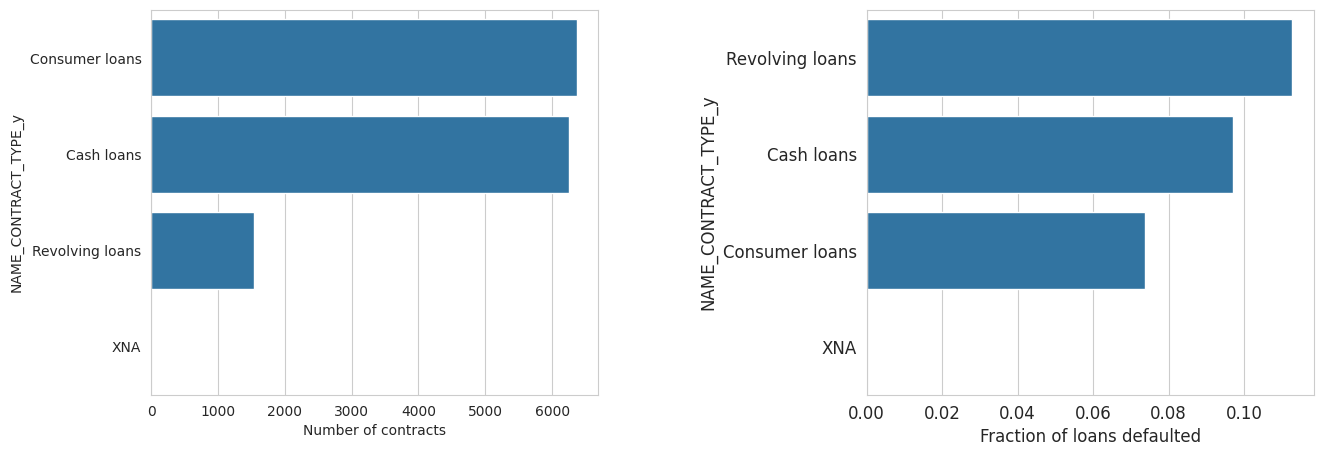

In [55]:
plot_bar_gen('NAME_CONTRACT_TYPE_y',application_prev_train)

For the feature, NAME_CASH_LOAN_PURPOSE, we see that most previous loans were for XAP/XNA and they are more defaulted by those who refuse to name the goal or for hobbies, car repairs

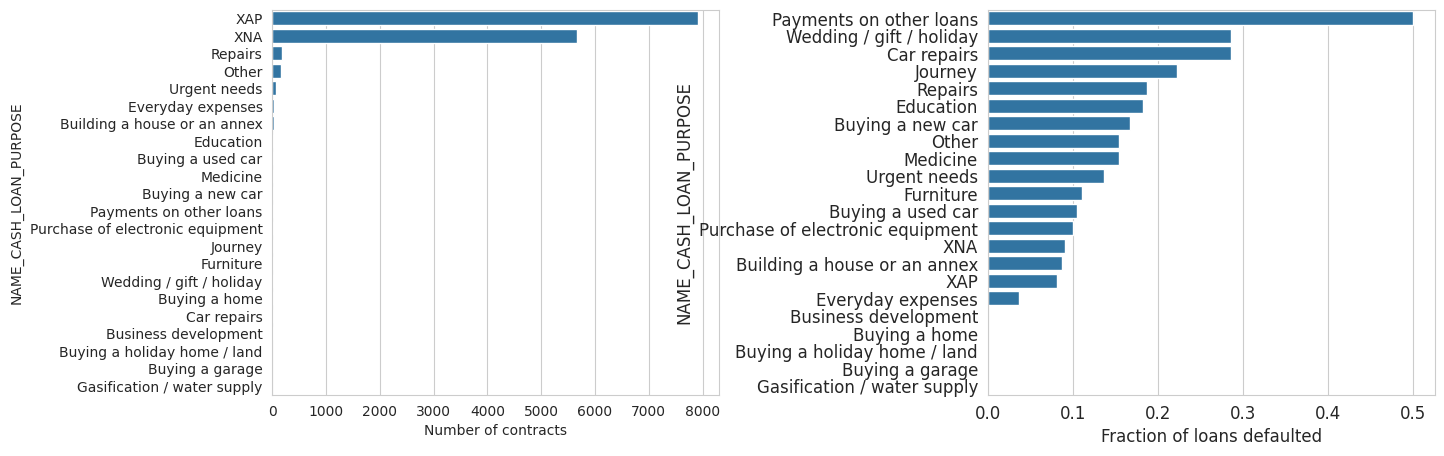

In [56]:
plot_bar_gen('NAME_CASH_LOAN_PURPOSE',application_prev_train)

For the feature, NAME_CONTRACT_STATUS, we see that most previous loans were approved and they are more defaulted by those who were refused or canceled

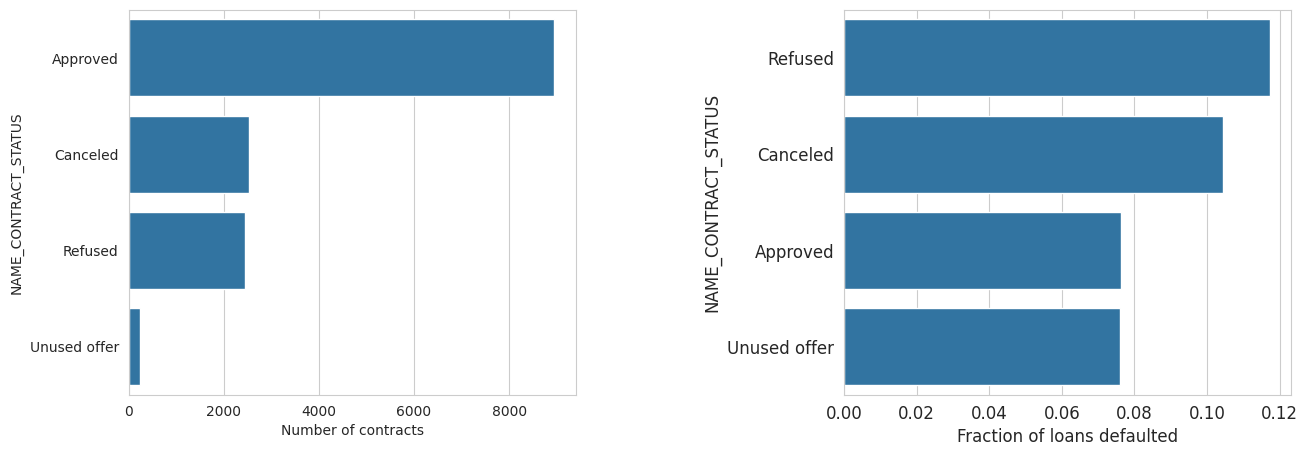

In [57]:
plot_bar_gen('NAME_CONTRACT_STATUS',application_prev_train)

For the feature, NAME_PAYMENT_TYPE, we see that most previous loans were for cash through bank and they are more defaulted by XNA and non-cash from account

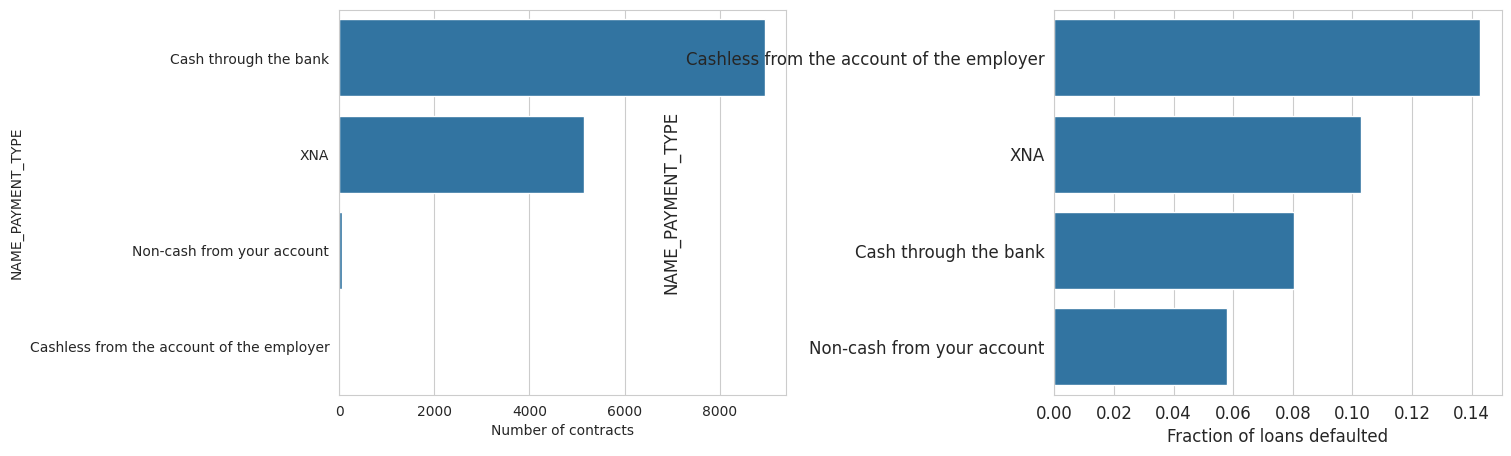

In [58]:
plot_bar_gen('NAME_PAYMENT_TYPE',application_prev_train)

For the feature, NAME_CLIENT_TYPE, we see that most previous loans were for repeated clients and they are more defaulted by those without information or new clients

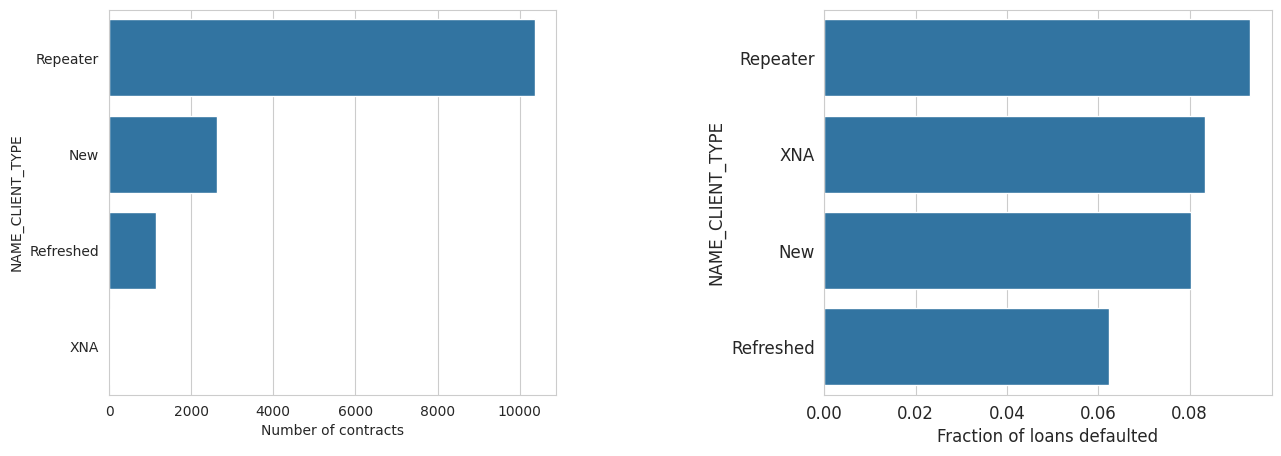

In [59]:
plot_bar_gen('NAME_CLIENT_TYPE',application_prev_train)

---

## <b> 3.0 Feature Engineering </b>

After exploring the data distributions, we can now conduct feature engineering to prepare the features before building the classifier models

---

<b> 3.1 Save/Load updated datasets </b> 

We create a checkpoint to save the updated data files if needed

In [60]:
## Save the csv files as a checkpoint if necessary (high memory and time intensive)

save_files = False

if save_files == True:
    application_train.to_csv('application_train_updated.csv', index = False)
    bureau.to_csv('bureau_updated.csv', index = False)
    bureau_balance.to_csv('bureau_balance_updated.csv', index = False)
    credit_card_balance.to_csv('credit_card_balance.csv', index = False)
    installments_payments.to_csv('installments_payments_updated.csv', index = False)
    pos_cash_balance.to_csv('pos_cash_balance_updated.csv', index = False)
    previous_application.to_csv('previous_application_updated.csv', index = False)

This is followed by the option of loading the previously saved updated datafiles, in case we are restarting the notebook

In [61]:
# Load csv files from checkpoint if necessary
# Otherwise, copy to new df and clean up memory 

load_files = False  # Existing variables in memory

if load_files == False:
    application_train_new = application_train.copy()
    bureau_new = bureau.copy()
    bureau_balance_new = bureau_balance.copy()
    credit_card_balance_new = credit_card_balance.copy()
    installments_payments_new = installments_payments.copy()
    pos_cash_balance_new = pos_cash_balance.copy()
    previous_application_new = previous_application.copy()
    
    gc.enable()
    del application_train, bureau, bureau_balance, credit_card_balance, installments_payments, pos_cash_balance, previous_application
    gc.collect()
    
else:
    application_train_new = pd.read_csv("application_train_updated.csv")
    bureau_new = pd.read_csv("bureau_updated.csv")            
    bureau_balance_new  = pd.read_csv("bureau_balance_updated.csv")      
    credit_card_balance_new  = pd.read_csv("credit_card_balance.csv")
    installments_payments_new = pd.read_csv("installments_payments_updated.csv")
    pos_cash_balance_new = pd.read_csv("pos_cash_balance_updated.csv")     
    previous_application_new  = pd.read_csv("previous_application_updated.csv")

---

<b> 3.2 Basic Feature Engineering (Replacing outliers, Imputing, One-hot encoding, Rescaling data) </b> 

First, a function is created and run to replace the day outliers previously seen across the data

In [62]:
def replace_day_outliers(df):
    """Replace 365243 with np.nan in any columns with DAYS"""
    for col in df.columns:
        if "DAYS" in col:
            df[col] = df[col].replace({365243: np.nan})

    return df

In [63]:
# Replace all the day outliers
application_train_new = replace_day_outliers(application_train_new)
bureau_new = replace_day_outliers(bureau_new )              
bureau_balance_new  = replace_day_outliers(bureau_balance_new)      
credit_card_balance_new  = replace_day_outliers(credit_card_balance_new) 
installments_payments_new = replace_day_outliers(installments_payments_new )
pos_cash_balance_new = replace_day_outliers(pos_cash_balance_new )   
previous_application_new  = replace_day_outliers(previous_application_new )

We create a function to remove columns which have missing values greater than 60%

In [64]:
#Function for removing columns with missing values more than 60%

def remove_missing_col(df):
    miss_data = pd.DataFrame((df.isnull().sum())*100/df.shape[0])
    miss_data_col=miss_data[miss_data[0]>60].index
    data_new  = df[[i for i in df.columns if i not in miss_data_col]]
    return data_new

Create a custom imputer function for both numerical and categorical variables

In [65]:
#Custom imputer for numerical and categorical variables (https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn)

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with median of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

One-hot encoding of categorical variables in the main training dataset is done

In [66]:
# one-hot encoding of categorical variables
base_case_train = pd.get_dummies(application_train_new)

After one-hot encoding, the index variable (SK_ID_CURR) is temporarily removed and the main dataset has values imputed to replace missing samples, and the features are rescaled

In [67]:
# Drop the SK_ID from the training data
skid_temp = application_train_new['SK_ID_CURR']
train = base_case_train.drop(columns = ['SK_ID_CURR'])
    
# Feature names
features = list(train.columns)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Median imputation of missing values
train = DataFrameImputer().fit_transform(train)

## Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
base_case_train = pd.DataFrame(data=train, columns=features)

print('Data shape: ', base_case_train.shape)

Data shape:  (30751, 241)


At this point, we can get the modified dataset for visual inspection. Looks ok!

In [68]:
base_case_train

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0         1.0           0.0          0.235294    0.183032     0.134304   
1         0.0           0.0          0.235294    0.056930     0.106444   
2         0.0           0.0          0.186275    0.033908     0.067767   
3         0.0           0.0          0.480392    0.324324     0.155235   
4         0.0           0.0          0.382353    0.256757     0.150158   
...       ...           ...               ...         ...          ...   
30746     0.0           0.0          0.333333    0.067432     0.073709   
30747     0.0           0.0          0.431373    0.052265     0.048105   
30748     0.0           0.2          0.137255    0.178703     0.132713   
30749     0.0           0.0          0.186275    0.150162     0.111440   
30750     0.0           0.0          0.137255    0.067432     0.051389   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  OWN_CAR_AGE  FLAG_MOBIL  \
0             0.162162                    0.069553     0.138462         0.0   
1             0.047297                    0.143358     0.200000         0.0   
2             0.028378                    0.446855     0.292308         0.0   
3             0.324324                    0.158035     0.138462         0.0   
4             0.256757                    0.134537     0.138462         0.0   
...                ...                         ...          ...         ...   
30746         0.054054                    0.429796     0.246154         0.0   
30747         0.044595                    0.635991     0.138462         0.0   
30748         0.121622                    0.158035     0.030769         0.0   
30749         0.121622                    0.109945     0.246154         0.0   
30750         0.054054                    0.142153     0.138462         0.0   

       FLAG_EMP_PHONE  ...  HOUSETYPE_MODE_terraced house  \
0                 0.0  ...                            0.0   
1                 1.0  ...                            0.0   
2                 1.0  ...                            0.0   
3                 1.0  ...                            0.0   
4                 1.0  ...                            0.0   
...               ...  ...                            ...   
30746             1.0  ...                            0.0   
30747             0.0  ...                            0.0   
30748             1.0  ...                            0.0   
30749             1.0  ...                            0.0   
30750             1.0  ...                            0.0   

       WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   
...                         ...                       ...   
30746                       0.0                       0.0   
30747                       0.0                       0.0   
30748                       0.0                       0.0   
30749                       0.0                       0.0   
30750                       0.0                       1.0   

       WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                                0.0                        0.0   
1                                0.0                        0.0   
2                                0.0                        0.0   
3                                0.0                        0.0   
4                                0.0                        0.0   
...                              ...                        ...   
30746                            0.0                        0.0   
30747                            0.0                        0.0   
30748                            0.0                        0.0   
30749                            

The index variable is reattached to the dataset

In [69]:
base_case_train['SK_ID_CURR'] = skid_temp

print('Data shape: ', base_case_train.shape)

Data shape:  (30751, 242)


---

<b> 3.3 Base Case- Logistic Regression </b>

Before we do advanced feature engineering and connect the other data files, we can run a logistic regression to see how a simple classifier model behaves as a sanity check. For this purpose, the dataset is temporarily split into training/test sets.

In [70]:
# Train-Test split -- temporary
# Logistic regression - sanity check 

#splitting application_train_newdf into train and test
train,test = train_test_split(base_case_train,test_size=.25,random_state = 123)

#separating dependent and independent variables
train_X = train[[i for i in train.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
train_Y = train[["TARGET"]]

test_X  = test[[i for i in test.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
test_Y  = test[["TARGET"]]

We can create a function for the classifier to train on data, predict using test data, and visualize the metrics and feature importances

In [71]:
#Model function

def model_base(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):
    
    # Extract feature names
    feature_names = list(dtrain_X.columns)
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    
    # Record the feature importances
    feature_importance_values= algorithm.coef_[0]
    feature_importance_values = np.absolute(feature_importance_values)
#     # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    print (algorithm)
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
    return feature_importances

On running the base case - logistic regression model, we see that it does a good job of predicting the cases when loan is repaid (f1-score = 0.96) but does not perform well to predict when loans are defaulted (f1-score = 0.02). 

However, since this is an imbalanced dataset, the accuracy score is still high at 0.9184. Hence, it is preferred to use test AUC ROC which does not depend on data imbalance and has a value of 0.7454 for the base case.  

LogisticRegression()
Accuracy score :  0.9189646201873048
classification report :
               precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      7668
         1.0       0.01      0.40      0.03        20

    accuracy                           0.92      7688
   macro avg       0.51      0.66      0.49      7688
weighted avg       1.00      0.92      0.96      7688



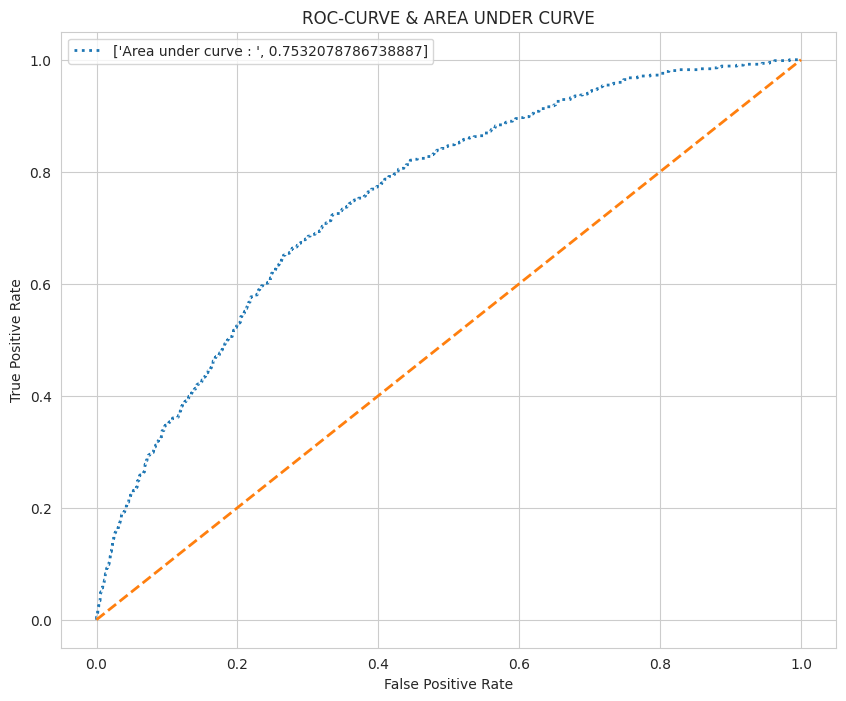

In [72]:
logit = LogisticRegression()
feature_importances_logit_base = model_base(logit,train_X,train_Y,test_X,test_Y,train_X.columns)

The Receiver Operating Characteristic Area under curve (ROC AUC) is a metric for which can be suitably applied for imbalanced datasets since it does not generate 0 or 1 predictions, but rather a probability between 0 and 1. It measures the false positive rate (x-axis) vs true positive rate (y-axis). The area under curve (AUC) is the area between a model's ROC curve and the diagonal indicating a model with naive random guessing. If the ROC curve is more to the left/top of the diagonal, is indicates better performance with a higher ROC AUC.

---

After training a base case, we can return to feature engineering.

First we apply our limited domain knowlege to create few more variables, specifically ratios accounting for the credit income %, annuity income %, credit term, and fraction of years employed  

In [73]:
#Domain knowledge

application_train_new['CREDIT_INCOME_PERCENT'] = application_train_new['AMT_CREDIT'] / application_train_new['AMT_INCOME_TOTAL']
application_train_new['ANNUITY_INCOME_PERCENT'] = application_train_new['AMT_ANNUITY'] / application_train_new['AMT_INCOME_TOTAL']
application_train_new['CREDIT_TERM'] = application_train_new['AMT_ANNUITY'] / application_train_new['AMT_CREDIT']
application_train_new['YEARS_EMPLOYED_PERCENT'] = application_train_new['YEARS_EMPLOYED'] / application_train_new['AGE']

---

<b> 3.4 Automated Feature Engineering using Featuretools </b>

To improve the results over the base case and to fully utilized the different datasets provided, we need to use feature engineering and relational database techniques to connect the various datasets. This will be done using extract, transform, load (ETL) techniques for automated feature engineering using [Featuretools](https://www.featuretools.com/)

We create a function to identify boolean variables in main training data and run it

In [74]:
# Iterate through the columns and record the Boolean columns

def bool_type(df):

    col_type = {}

    for col in df:
        # If column is a number with only two values, encode it as a Boolean
        if (df[col].dtype != 'object') and (len(df[col].unique()) <= 2):
            col_type[col] = ft.variable_types.Boolean

    print('Number of boolean variables: ', len(col_type))
    return col_type

In [75]:
train_col_type = bool_type(application_train_new)

train_col_type['REGION_RATING_CLIENT'] = ft.variable_types.Ordinal
train_col_type['REGION_RATING_CLIENT_W_CITY'] = ft.variable_types.Ordinal

Number of boolean variables:  33


We start connecting the datasets using Featuretools by first creating an entity and then adding the datasets while connected by a common index (SK_ID_CURR). For other datasets, indexes are created as necessary 

In [76]:
# Entity set with id applications
es = ft.EntitySet(id = 'clients')

In [77]:
# Entities with a unique index
es = es.entity_from_dataframe(entity_id = 'app', dataframe = application_train_new, index = 'SK_ID_CURR', variable_types = train_col_type)

In [78]:
es = es.entity_from_dataframe(entity_id = 'bureau', dataframe = bureau_new, index = 'SK_ID_BUREAU')


In [79]:
es = es.entity_from_dataframe(entity_id = 'previous', dataframe = previous_application_new, index = 'SK_ID_PREV')

In [80]:
# Entities that do not have a unique index
es = es.entity_from_dataframe(entity_id = 'bureau_balance', dataframe = bureau_balance_new, 
                              make_index = True, index = 'bureaubalance_index') 


In [81]:
es = es.entity_from_dataframe(entity_id = 'cash', dataframe = pos_cash_balance_new, 
                              make_index = True, index = 'cash_index')

In [82]:
es = es.entity_from_dataframe(entity_id = 'installments', dataframe = installments_payments_new,
                              make_index = True, index = 'installments_index')



In [83]:
es = es.entity_from_dataframe(entity_id = 'credit', dataframe = credit_card_balance_new,
                              make_index = True, index = 'credit_index')

The relationships between the different datasets are defined as per the below flowchart while ensuring that the parent-child relationship does not have any cross-connections 


![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

In [84]:
# Relationship between app and bureau
r_app_bureau = ft.Relationship(es['app']['SK_ID_CURR'], es['bureau']['SK_ID_CURR'])

# Relationship between bureau and bureau balance
r_bureau_balance = ft.Relationship(es['bureau']['SK_ID_BUREAU'], es['bureau_balance']['SK_ID_BUREAU'])

# Relationship between current app and previous apps
r_app_previous = ft.Relationship(es['app']['SK_ID_CURR'], es['previous']['SK_ID_CURR'])

# Relationships between previous apps and cash, installments, and credit
r_previous_cash = ft.Relationship(es['previous']['SK_ID_PREV'], es['cash']['SK_ID_PREV'])
r_previous_installments = ft.Relationship(es['previous']['SK_ID_PREV'], es['installments']['SK_ID_PREV'])
r_previous_credit = ft.Relationship(es['previous']['SK_ID_PREV'], es['credit']['SK_ID_PREV'])

The individual relationships are pooled together and the entity set is shown for inspection 

In [85]:
# Add in the defined relationships
es = es.add_relationships([r_app_bureau, r_bureau_balance, r_app_previous,
                           r_previous_cash, r_previous_installments, r_previous_credit])
# Print out the EntitySet
es

Entityset: clients
  Entities:
    app [Rows: 30751, Columns: 126]
    bureau [Rows: 171643, Columns: 17]
    previous [Rows: 167021, Columns: 37]
    bureau_balance [Rows: 2729992, Columns: 4]
    cash [Rows: 1000136, Columns: 9]
    installments [Rows: 1360540, Columns: 9]
    credit [Rows: 384031, Columns: 24]
  Relationships:
    bureau.SK_ID_CURR -> app.SK_ID_CURR
    bureau_balance.SK_ID_BUREAU -> bureau.SK_ID_BUREAU
    previous.SK_ID_CURR -> app.SK_ID_CURR
    cash.SK_ID_PREV -> previous.SK_ID_PREV
    installments.SK_ID_PREV -> previous.SK_ID_PREV
    credit.SK_ID_PREV -> previous.SK_ID_PREV

[Feature primitives](https://docs.featuretools.com/automated_feature_engineering/primitives.html) are operations conducted on tables to create a feature. The two common types are aggregation and transformation.

An Aggregation groups together values from child dataset for each parent and then calculates a feature such as mean, min, max, or standard deviation. A transformation can be applied to one or more columns in a single table such as the difference between two columns or the absolute value of one. Some common primitives in featuretools are shown below

In [86]:
# List the primitives in a dataframe
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100
primitives[primitives['type'] == 'aggregation'].head(10)

name         type  dask_compatible  \
0             last  aggregation            False   
1              min  aggregation             True   
2             mean  aggregation             True   
3              std  aggregation             True   
4           median  aggregation            False   
5    n_most_common  aggregation            False   
6       num_unique  aggregation             True   
7              sum  aggregation             True   
8  time_since_last  aggregation            False   
9     percent_true  aggregation             True   

                                                                 description  
0                                       Determines the last value in a list.  
1                      Calculates the smallest value, ignoring `NaN` values.  
2                                 Computes the average for a list of values.  
3        Computes the dispersion relative to the mean value, ignoring `NaN`.  
4                      Determines the middlemost number in a list of values.  
5                                   Determines the `n` most common elements.  
6           Determines the number of distinct values, ignoring `NaN` values.  
7                             Calculates the total addition, ignoring `NaN`.  
8  Calculates the time elapsed since the last datetime (default in seconds).  
9                                   Determines the percent of `True` values.

In [87]:
primitives[primitives['type'] == 'transform'].head(10)

name       type  dask_compatible  \
22                       weekday  transform             True   
23  greater_than_equal_to_scalar  transform             True   
24                       cum_sum  transform            False   
25                        minute  transform             True   
26           greater_than_scalar  transform             True   
27                          hour  transform             True   
28           time_since_previous  transform            False   
29                           and  transform             True   
30                       is_null  transform             True   
31                         month  transform             True   

                                                          description  
22                    Determines the day of the week from a datetime.  
23  Determines if values are greater than or equal to a given scalar.  
24                                     Calculates the cumulative sum.  
25                        Determines the minutes value of a datetime.  
26              Determines if values are greater than a given scalar.  
27                           Determines the hour value of a datetime.  
28               Compute the time since the previous entry in a list.  
29                             Element-wise logical AND of two lists.  
30                                     Determines if a value is null.  
31                          Determines the month value of a datetime.

A few default primitives are selected for Deep Feature Synthesis (DFS), which is the process featuretools uses to make new features. The depth is the number of primitives that are stacked together to form new features. Initially, we only see the number of features by using features_only = TRUE which creates the feature combinations but does not actually do the calculations for the data.

In [88]:
# Default primitives from featuretools
default_agg_primitives =  ['sum', 'count', 'min', 'max', 'mean', 'mode']
default_trans_primitives =  ['diff', 'cum_sum', 'cum_mean', 'percentile']

# DFS with specified primitives
feature_names = ft.dfs(entityset = es, target_entity = 'app',
                       trans_primitives = default_trans_primitives,
                       agg_primitives=default_agg_primitives, 
                       max_depth = 2, features_only=True)

print('%d Total Features' % len(feature_names))

3534 Total Features


We see that 3534 features are expected to be created from the DFS process. Moving forward, we can create the features and display the created features for inspection

In [89]:
# DFS with default primitives

feature_matrix, feature_names = ft.dfs(entityset = es, target_entity = 'app',
                                       trans_primitives = default_trans_primitives,
                                       agg_primitives=default_agg_primitives, 
                                        max_depth = 2, features_only=False, verbose = True)

pd.options.display.max_columns = 1500
feature_matrix.head(10)

Built 3534 features
Elapsed: 01:26 | Progress: 100%|██████████


NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
SK_ID_CURR                                                               
174545             Cash loans           F            N               Y   
209898             Cash loans           M            Y               Y   
454938             Cash loans           M            Y               Y   
398930             Cash loans           M            Y               N   
201672             Cash loans           M            N               Y   
132243        Revolving loans           F            N               Y   
429350             Cash loans           F            N               N   
410203             Cash loans           F            N               N   
376596             Cash loans           F            N               N   
446827             Cash loans           M            Y               N   

            CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
174545                 0          135000.0    654498.0      31617.0   
209898                 0          135000.0    234576.0      25393.5   
454938                 0          112500.0    157914.0      16753.5   
398930                 0          247500.0   1125000.0      36292.5   
201672                 0          202500.0    900000.0      35158.5   
132243                 0          121500.0    225000.0      11250.0   
429350                 0           90000.0    808650.0      26086.5   
410203                 2           54000.0    450000.0      21888.0   
376596                 1          180000.0   1125000.0      47664.0   
446827                 0          121500.0    343377.0      13072.5   

            AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
SK_ID_CURR                                                     
174545             585000.0   Unaccompanied        Pensioner   
209898             202500.0   Unaccompanied          Working   
454938             139500.0   Unaccompanied          Working   
398930            1125000.0   Unaccompanied          Working   
201672             900000.0   Unaccompanied          Working   
132243             225000.0   Unaccompanied        Pensioner   
429350             675000.0   Unaccompanied          Working   
410203             450000.0   Unaccompanied          Working   
376596            1125000.0   Unaccompanied          Working   
446827             283500.0   Unaccompanied          Working   

                      NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
SK_ID_CURR                                                        
174545      Secondary / secondary special               Married   
209898      Secondary / secondary special  Single / not married   
454938      Secondary / secondary special  Single / not married   
398930                  Incomplete higher               Married   
201672      Secondary / secondary special               Married   
132243      Secondary / secondary special                 Widow   
429350      Secondary / secondary special             Separated   
410203                   Higher education               Married   
376596      Secondary / secondary special               Married   
446827      Secondary / secondary special             Separated   

              NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  OWN_CAR_AGE  \
SK_ID_CURR                                                                 
174545        House / apartment                    0.005313          NaN   
209898             With parents                    0.010643         13.0   
454938        House / apartment                    0.032561         19.0   
398930        House / apartment                    0.011703          9.0   
201672      Municipal apartment                    0.010006          NaN   
132243        House / apartment                    0.018209          NaN   
429350      Municipal apartment                    0.009549          NaN   
410203     

In the above table, we see that there are a number of different features created, including a number of categorical ones. Moreover, many features have high missing values and other may have a high degree of correlations with each other. Such issues need to be accounted for before training models.

---

<b> 3.5 Return to manual feature engineering </b>

First, we remove the features having more than 60% missing values from the newly constructed dataset

In [90]:
#Removing columns with missing values more than 60% in new df

feature_matrix = remove_missing_col(feature_matrix)

Then, we separate the reponse feature (TARGET) temporarily before conducting other operations 

In [91]:
#Separate TARGET feature temporarily 
target_temp = feature_matrix['TARGET']
feature_matrix = feature_matrix.drop(columns = ['TARGET'])

The categorical variables are one-hot encoded

In [92]:
# one-hot encoding of categorical variables
feature_matrix = pd.get_dummies(feature_matrix)

The features with low information (only 1 unique value) are removed

In [93]:
# Remove features with only one unique value
feature_matrix2 = selection.remove_low_information_features(feature_matrix)

print('Removed %d features' % (feature_matrix.shape[1]- feature_matrix2.shape[1]))

Removed 11 features


We can see that the one-hot encoding has increased the columns even if the other operations reduced them.

In [94]:
feature_matrix2.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
174545                 0          135000.0    654498.0      31617.0   
209898                 0          135000.0    234576.0      25393.5   
454938                 0          112500.0    157914.0      16753.5   
398930                 0          247500.0   1125000.0      36292.5   
201672                 0          202500.0    900000.0      35158.5   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
SK_ID_CURR                                                                 
174545             585000.0                    0.005313              2.0   
209898             202500.0                    0.010643              1.0   
454938             139500.0                    0.032561              1.0   
398930            1125000.0                    0.011703              2.0   
201672             900000.0                    0.010006              2.0   

            HOUR_APPR_PROCESS_START  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
SK_ID_CURR                                                                      
174545                            9           NaN      0.622652      0.602386   
209898                           17           NaN      0.655960      0.492060   
454938                           14      0.690999      0.670793           NaN   
398930                           16      0.508749      0.486120      0.345785   
201672                            8      0.068939      0.247563      0.227613   

            APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
SK_ID_CURR                                                                  
174545                 NaN               NaN                          NaN   
209898                 NaN               NaN                          NaN   
454938                 NaN               NaN                          NaN   
398930                 NaN               NaN                          NaN   
201672               0.034            0.0821                       0.9861   

            ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  LIVINGAREA_AVG  \
SK_ID_CURR                                                                
174545                NaN            NaN            NaN             NaN   
209898                NaN            NaN            NaN             NaN   
454938                NaN            NaN            NaN             NaN   
398930                NaN            NaN            NaN             NaN   
201672                0.0         0.1034         0.0833             NaN   

            NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  \
SK_ID_CURR                                                          
174545                    NaN              NaN                NaN   
209898                    NaN              NaN                NaN   
454938                    NaN              NaN                NaN   
398930                    NaN              NaN                NaN   
201672                 0.0649           0.0347             0.0852   

            YEARS_BEGINEXPLUATATION_MODE  ELEVATORS_MODE  ENTRANCES_MODE  \
SK_ID_CURR                                                                 
174545                               NaN             NaN             NaN   
209898                               NaN             NaN             NaN   
454938                               NaN             NaN             NaN   
398930                               NaN             NaN             NaN   
201672                            0.9861             0.0          0.1034   

            FLOORSMAX_MODE  LIVINGAREA_MODE  NONLIVINGAREA_MODE  \
SK_ID_CURR                                                        
174545                 NaN              NaN                 NaN   
209898                 NaN              NaN                 NaN   
454938                 NaN              NaN                 Na

Since there are almost 3000 features (columns), it is important to account for correlated features which do not add unique information but contribute to the curse of dimensionality. Hence, we can create a correlation matrix to find the correlated features and remove one feature from each correlation pair which is larger than a given threshold (0.8).  

In [95]:
feature_matrix=feature_matrix2.copy()

In [97]:
# Threshold for removing correlated variables (without TARGET)
threshold = 0.8

# Calculate absolute value correlation matrix
corr_matrix = feature_matrix.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Select columns with correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d features to remove.' % (len(collinear_features)))

There are 829 features to remove.


In [98]:
#Remove collinear features
feature_matrix = feature_matrix[[col for col in feature_matrix.columns if col not in collinear_features]] 

In [99]:
feature_matrix['TARGET'] = target_temp

The table below shows the dataset at this stage, and we can see that there are still a number of NaN values and features that require scaling.

In [100]:
feature_matrix.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
174545                 0          135000.0    654498.0      31617.0   
209898                 0          135000.0    234576.0      25393.5   
454938                 0          112500.0    157914.0      16753.5   
398930                 0          247500.0   1125000.0      36292.5   
201672                 0          202500.0    900000.0      35158.5   

            REGION_POPULATION_RELATIVE  HOUR_APPR_PROCESS_START  EXT_SOURCE_1  \
SK_ID_CURR                                                                      
174545                        0.005313                        9           NaN   
209898                        0.010643                       17           NaN   
454938                        0.032561                       14      0.690999   
398930                        0.011703                       16      0.508749   
201672                        0.010006                        8      0.068939   

            EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
SK_ID_CURR                                                                 
174545          0.622652      0.602386             NaN               NaN   
209898          0.655960      0.492060             NaN               NaN   
454938          0.670793           NaN             NaN               NaN   
398930          0.486120      0.345785             NaN               NaN   
201672          0.247563      0.227613           0.034            0.0821   

            YEARS_BEGINEXPLUATATION_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  \
SK_ID_CURR                                                              
174545                              NaN            NaN            NaN   
209898                              NaN            NaN            NaN   
454938                              NaN            NaN            NaN   
398930                              NaN            NaN            NaN   
201672                           0.9861         0.1034         0.0833   

            NONLIVINGAREA_AVG  OBS_30_CNT_SOCIAL_CIRCLE  \
SK_ID_CURR                                                
174545                    NaN                       0.0   
209898                    NaN                       1.0   
454938                    NaN                       1.0   
398930                    NaN                       1.0   
201672                 0.0649                       0.0   

            DEF_30_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
SK_ID_CURR                                                     
174545                           0.0                 -1237.0   
209898                           0.0                  -379.0   
454938                           0.0                  -343.0   
398930                           1.0                 -1269.0   
201672                           0.0                  -524.0   

            AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
SK_ID_CURR                                                          
174545                             0.0                        0.0   
209898                             0.0                        0.0   
454938                             0.0                        0.0   
398930                             0.0                        0.0   
201672                             0.0                        0.0   

            AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
SK_ID_CURR                                                          
174545                             0.0                        0.0   
209898                             1.0                        0.0   
454938                             0.0                        0.0   
398930                             0.0                        9.0   
201672                             0.0                        0.0   

            AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR   AG

Hence, imputation of missing values is done, followed by scaling to make the dataset ready for modeling.

In [101]:
# Feature names
features = list(feature_matrix.columns)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Median imputation of missing values
train = DataFrameImputer().fit_transform(feature_matrix)
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(feature_matrix.median(), inplace=True)

## Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
feature_matrix = pd.DataFrame(data=train, columns=features)

The dataset is finally ready for training. However, before that we can save it as a checkpoint or load it from this checkpoint

In [102]:
#save dataset

feature_matrix.to_csv('feature_matrix.csv')

#load dataset

#feature_matrix= pd.read_csv("feature_matrix.csv")

---

### <b> 4.0 Classifier Models: Training, Prediction and Comparison </b> 

Now that we have created the final dataset, we can start building the classifier models and compare then.

---

<b> 4.1 Data split and imbalance correction </b>

First, we split the data into training/testing set in the ratio 75:25

In [103]:
#splitting application_train_newdf into train and test
train,test = train_test_split(feature_matrix,test_size=.25,random_state = 123)

#separating dependent and independent variables (no under/over sampling)
train_X = train[[i for i in train.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
train_Y = train[["TARGET"]]

test_X  = test[[i for i in test.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
test_Y  = test[["TARGET"]]

Since the dataset is imbalanced in the favor of majority samples being where the loans are repaid (TARGET=1) in a ratio more than 10:1, we can resample the data, by undersampling the majority class to make the data more balanced. So that we do not lose too much valuable data, the number of majority class samples is kept as twice the number of minority class.  

In [104]:
# Down-sample Majority Class

count = train['TARGET'].value_counts()
num_majority = count[0]
num_minority = count[1]

#Number of undersampled majority class 2 x minority class
num_undersample_majority = 2 * num_minority

#separating majority and minority classes
df_majority = train[train["TARGET"] == 0]
df_minority = train[train["TARGET"] == 1]

df_majority_undersampled = resample(df_majority, replace=False,
                                   n_samples=num_undersample_majority,
                                   random_state=123)

df_undersampled = pd.concat([df_minority,df_majority_undersampled],axis=0)

#splitting dependent and independent variables

df_undersampled_X = df_undersampled[[i for i in df_undersampled.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
df_undersampled_Y = df_undersampled[["TARGET"]]

---

<b> 4.2 Training classifier models </b>

First, we create a function for the classifier to train on data, predict using test data, and visualize the metrics

In [105]:
#Model function

def model_run(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    
    accuracy = accuracy_score(dtest_Y,predictions)
    classify_metrics = classification_report(dtest_Y,predictions)
    f1=f1_score(dtest_Y,predictions)
    
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    auc_score = auc(fpr,tpr)
    
    print (algorithm)
    print ("Accuracy score : ", accuracy)
    print ("F1 score : ", f1)
    print ("AUC : ", auc_score)
    print ("classification report :\n", classify_metrics)
    
    return accuracy, classify_metrics, fpr , tpr, auc_score, f1

***Model 1: Logistic Regression***

In [106]:
logit = LogisticRegression()
accuracy_logit, classify_metrics_logit, fpr_logit , tpr_logit, auc_score_logit, f1_logit = model_run(logit,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

LogisticRegression()
Accuracy score :  0.8240114464099896
F1 score :  0.28450555261766264
AUC :  0.748881267524295
classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.86      0.90      7069
         1.0       0.21      0.43      0.28       619

    accuracy                           0.82      7688
   macro avg       0.58      0.65      0.59      7688
weighted avg       0.89      0.82      0.85      7688



***Model 2: Random Forest Classifier***

In [107]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
accuracy_rfc, classify_metrics_rfc, fpr_rfc , tpr_rfc, auc_score_rfc, f1_rfc = model_run(rfc,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

RandomForestClassifier()
Accuracy score :  0.8860561914672217
F1 score :  0.24742268041237114
AUC :  0.7031787519788213
classification report :
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      7069
         1.0       0.26      0.23      0.25       619

    accuracy                           0.89      7688
   macro avg       0.60      0.59      0.59      7688
weighted avg       0.88      0.89      0.88      7688



***Model 3: Decision Tree Classifier***

In [108]:
dtc = DecisionTreeClassifier()
accuracy_dtc, classify_metrics_dtc, fpr_dtc , tpr_dtc, auc_score_dtc, f1_dtc = model_run(dtc,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

DecisionTreeClassifier()
Accuracy score :  0.6824921956295525
F1 score :  0.1756163458291118
AUC :  0.5627534588093226
classification report :
               precision    recall  f1-score   support

         0.0       0.93      0.71      0.80      7069
         1.0       0.11      0.42      0.18       619

    accuracy                           0.68      7688
   macro avg       0.52      0.56      0.49      7688
weighted avg       0.87      0.68      0.75      7688



***Model 4: Gaussian Naive Bayes Classifier***

In [109]:
gnb = GaussianNB()
accuracy_gnb, classify_metrics_gnb, fpr_gnb , tpr_gnb, auc_score_gnb, f1_gnb = model_run(gnb,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

GaussianNB()
Accuracy score :  0.2715920915712799
F1 score :  0.15991599159915992
AUC :  0.6095748782312177
classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.22      0.36      7069
         1.0       0.09      0.86      0.16       619

    accuracy                           0.27      7688
   macro avg       0.52      0.54      0.26      7688
weighted avg       0.88      0.27      0.34      7688



***Model 5: XGBoost Classifier***

In [110]:
xgb = XGBClassifier()
accuracy_xgb, classify_metrics_xgb, fpr_xgb, tpr_xgb, auc_score_xgb, f1_xgb = model_run(xgb,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy score :  0.8042403746097815
F1 score :  0.23951490651844365
AUC :  0.7014738861867248
classification report :
               precision    recall  f1-score   support

         0.0       0.94      0.84      0.89      7069
         1.0 

***Model 6: Gradient Boosting Classifier***

In [111]:
gbc = GradientBoostingClassifier()
accuracy_gbc, classify_metrics_gbc, fpr_gbc, tpr_gbc, auc_score_gbc, f1_gbc = model_run(gbc,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

GradientBoostingClassifier()
Accuracy score :  0.841831425598335
F1 score :  0.27705112960760997
AUC :  0.7432629805761852
classification report :
               precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      7069
         1.0       0.22      0.38      0.28       619

    accuracy                           0.84      7688
   macro avg       0.58      0.63      0.59      7688
weighted avg       0.88      0.84      0.86      7688



***Model 7: LightGBM Classifier***

In [135]:
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

#Split into training and evaluation sets
x_train, x_eval, y_train, y_eval = train_test_split(df_undersampled_X, df_undersampled_Y, test_size=0.2, random_state=42)

#Remove possible JSON characters
x_train = x_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
x_eval = x_eval.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_eval = y_eval.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# Train the model
model.fit(x_train, y_train, eval_set = [(x_eval, y_eval)], eval_names =['valid'], eval_metric ='auc', callbacks=[
        lgb.early_stopping(stopping_rounds=200),
    ]);

# prediction
predictions = model.predict(test_X);
prediction_probabilities = model.predict_proba(test_X)[:,1];

# metrics
accuracy_lgbc = accuracy_score(test_Y,predictions)
classify_metrics_lgbc = classification_report(test_Y,predictions)  
fpr_lgbc , tpr_lgbc , thresholds   = roc_curve(test_Y,prediction_probabilities)
auc_score_lgbc = auc(fpr_lgbc,tpr_lgbc)
f1_lgbc=f1_score(test_Y,predictions)

[LightGBM] [Info] Number of positive: 1443, number of negative: 2934
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 49834
[LightGBM] [Info] Number of data points in the train set: 4377, number of used features: 391
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[56]	valid's auc: 0.743073	valid's binary_logloss: 0.578018


In [136]:
print ("Accuracy score : ", accuracy_lgbc)
print ("F1 score : ", f1_lgbc)
print ("AUC : ", auc_score_lgbc)
print ("classification report :\n", classify_metrics_lgbc)

Accuracy score :  0.7229448491155047
F1 score :  0.2568039078855548
AUC :  0.7308245448568245
classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.73      0.83      7069
         1.0       0.16      0.59      0.26       619

    accuracy                           0.72      7688
   macro avg       0.56      0.66      0.54      7688
weighted avg       0.89      0.72      0.78      7688



<b> 4.3 Classifier model comparison </b>

After training the different classifier models, we can compare their performance on the test data using metrics like accuracy, F1-score and ROC AUC with functions given below. 

In [137]:
# Combine results together and compare stats for all

classifier_names =['Logistic Regression','Random Forest','Decision Tree','Gaussian Naive Bayes','XGBoost','Gradient Boosting','LightGBM']
accuracy_scores = [accuracy_logit, accuracy_rfc, accuracy_dtc, accuracy_gnb, accuracy_xgb, accuracy_gbc, accuracy_lgbc] 
f1_scores = [f1_logit, f1_rfc, f1_dtc, f1_gnb, f1_xgb, f1_gbc, f1_lgbc]
auc_scores = [auc_score_logit, auc_score_rfc, auc_score_dtc, auc_score_gnb, auc_score_xgb, auc_score_gbc, auc_score_lgbc]

In [138]:
print(len(classifier_names))
print(len(accuracy_scores))
print(len(f1_scores))
print(len(auc_scores))


7
7
7
7


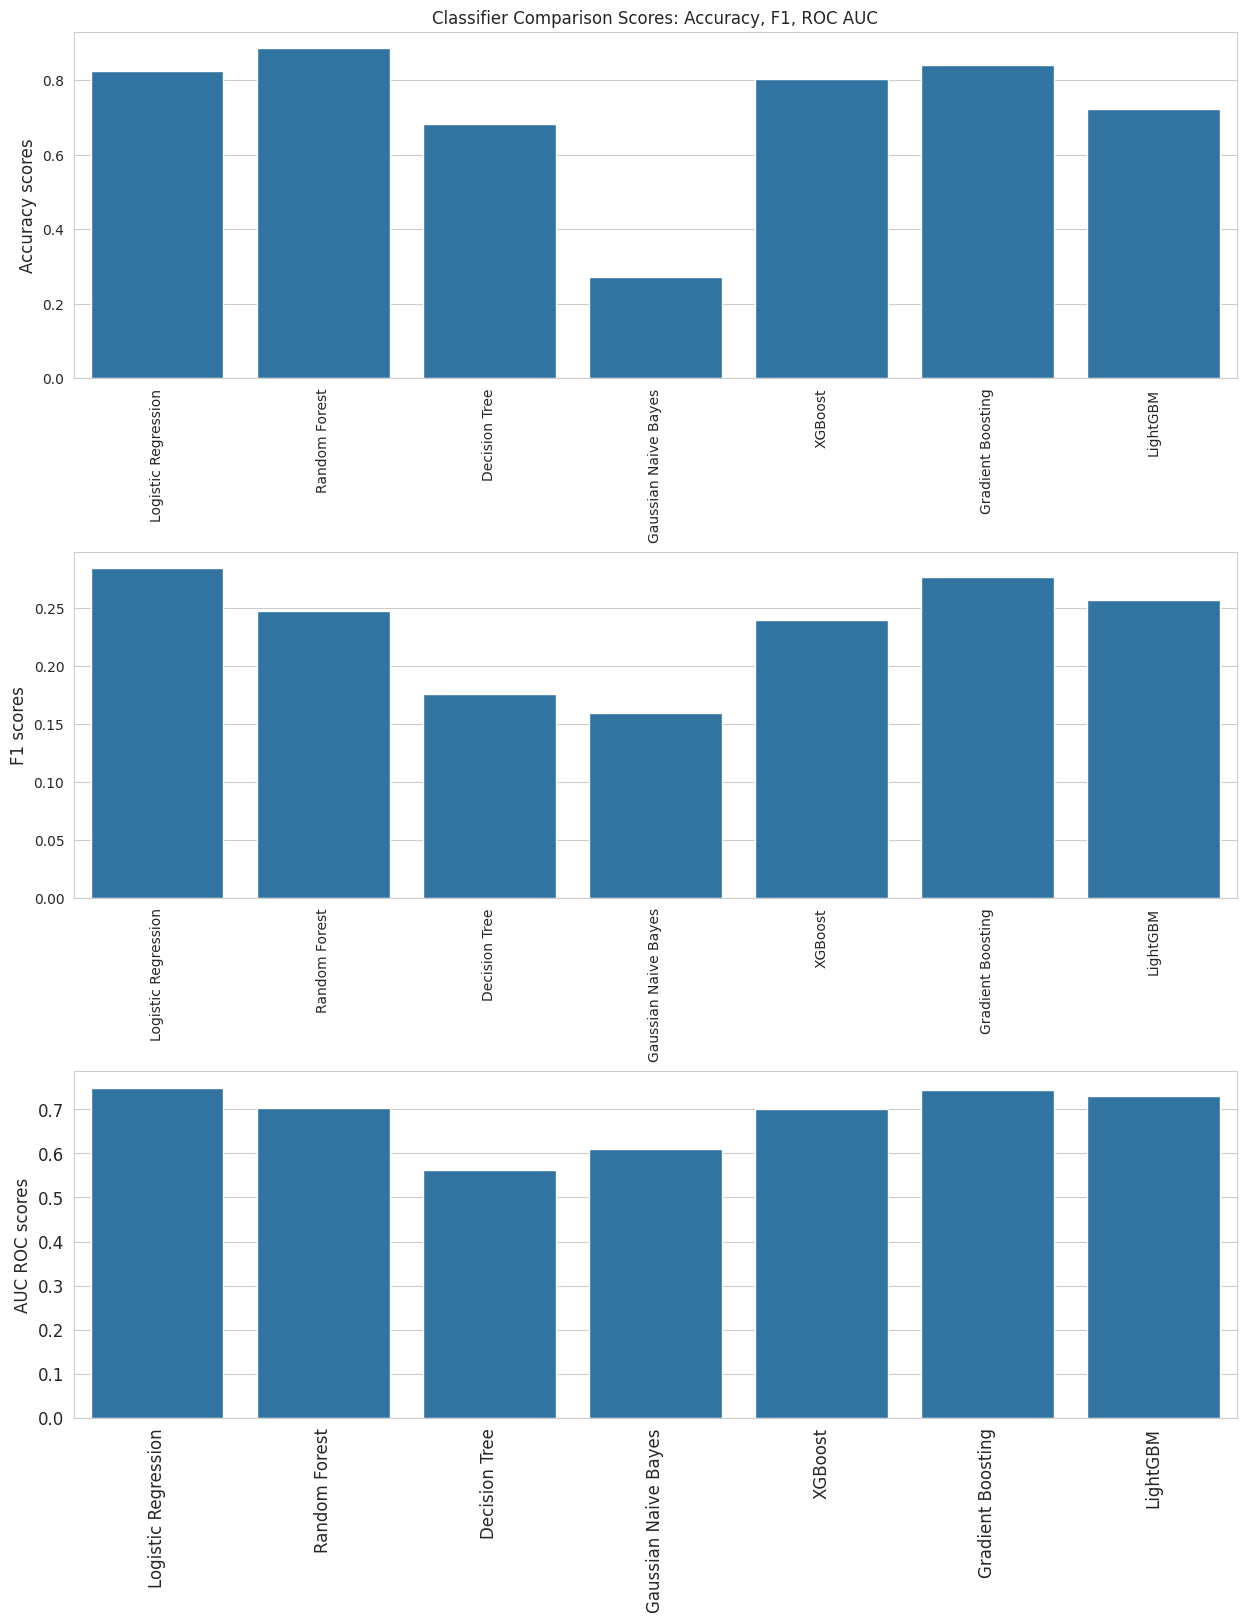

In [139]:
sns.set_color_codes("colorblind")
    
plt.figure(figsize=(15,18))
plt.subplot(311)
plt.title('Classifier Comparison Scores: Accuracy, F1, ROC AUC')
s1 = sns.barplot(x = classifier_names, y=accuracy_scores)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
#s1.ylabel('accuracy scores', fontsize=12)
plt.ylabel('Accuracy scores', fontsize=12)
plt.subplot(312)
s2 = sns.barplot(x = classifier_names, y=f1_scores)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
#s2.ylabel('F1 scores', fontsize=12)
plt.ylabel('F1 scores', fontsize=12)
plt.subplot(313)
s3 = sns.barplot(x = classifier_names, y=auc_scores)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.ylabel('AUC ROC scores', fontsize=12)
   
plt.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(hspace = 0.5)
plt.show();

Text(0, 0.5, 'True Positive Rate')

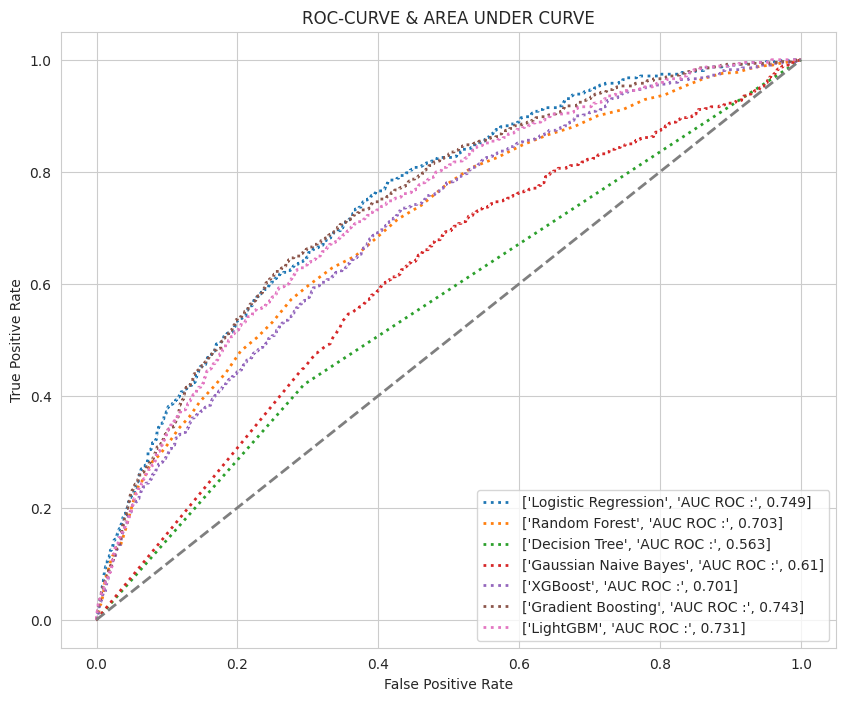

In [140]:
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)
    
ax.plot(fpr_logit,tpr_logit,label = [classifier_names[0], "AUC ROC :", round(auc_score_logit,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_rfc,tpr_rfc,label = [classifier_names[1], "AUC ROC :", round(auc_score_rfc,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_dtc,tpr_dtc,label = [classifier_names[2], "AUC ROC :", round(auc_score_dtc,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_gnb,tpr_gnb,label = [classifier_names[3], "AUC ROC :", round(auc_score_gnb,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_xgb,tpr_xgb,label = [classifier_names[4], "AUC ROC :", round(auc_score_xgb,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_gbc,tpr_gbc,label = [classifier_names[5], "AUC ROC :", round(auc_score_gbc,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_lgbc,tpr_lgbc,label = [classifier_names[6], "AUC ROC :", round(auc_score_lgbc,3)],linewidth=2,linestyle="dotted")

ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
plt.legend(loc="best")
plt.title("ROC-CURVE & AREA UNDER CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


---

<b> 4.4 K-Fold Cross validation to improve model </b>

After choosing the classifier, we can use K-fold cross validation to train multiple iterations of the model by subsampling the validation data from the training dataset during different folds. This will help us choose parameters that correspond to the best performance without creating a separate validation dataset.  

In [143]:
def model_classify(model_in, dtrain_X, dtrain_Y, dtest_X, dtest_Y, n_folds = 5):
    
    """Train and test a model using cross validation. 
    """
       
    # Extract the ids
    train_ids = dtrain_X.index
    test_ids = dtest_X.index
    
    print('Training Data Shape: ', dtrain_X.shape)
    print('Testing Data Shape: ', dtest_X.shape)
    
    # Extract feature names
    feature_names = list(dtrain_X.columns)
    
    # Convert to np arrays
    features = np.array(dtrain_X)
    test_features = np.array(dtest_X)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    predictions = np.zeros(test_features.shape[0])
    predictions_class = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # print model
    
    print (model_in)
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], dtrain_Y.iloc[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], dtrain_Y.iloc[valid_indices]
        
        model = model_in
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'],
                  callbacks=[
        lgb.early_stopping(stopping_rounds=200),  ])
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions    
        predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
             
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del train_features, valid_features
        gc.collect()
        
    # Make the predictions dataframe
    test_predictions = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(dtrain_Y, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    
    # Dataframe of validation scores
    fold_scores = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    predictions_class = model.predict(test_features, num_iteration = best_iteration)

    
    fpr , tpr , thresholds   = roc_curve(dtest_Y,predictions)
    auc_roc = auc(fpr,tpr)
    f1_sc = f1_score(dtest_Y,predictions_class)
    accuracy = accuracy_score(dtest_Y,predictions_class)
    classify_metrics = classification_report(dtest_Y,predictions_class)
       
    print (model)
    
    return feature_importances, classify_metrics, fold_scores, accuracy, f1_sc, auc_roc, fpr, tpr 

In [144]:
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

feature_importances, classify_metrics, fold_scores, accuracy, f1_sc, auc_score, fpr, tpr  = model_classify(model, df_undersampled_X, df_undersampled_Y, test_X, test_Y)

print('Baseline metrics')
print(fold_scores)

Training Data Shape:  (5472, 485)
Testing Data Shape:  (7688, 485)
LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=10000,
               n_jobs=-1, objective='binary', random_state=50, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)
[LightGBM] [Info] Number of positive: 1463, number of negative: 2914
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 49755
[LightGBM] [Info] Number of data points in the train set: 4377, number of used features: 386
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[134]	train's auc: 0.99229	train's binary_logloss: 0.286075	valid's auc: 0.715617	valid's binary_logloss: 0.5941
[LightGBM] [Info] Number of 

The training and validation scores are seen to be in the same range, showing that the model is not overfitting the data. The best iteration can then be used for prediction on test data

Accuracy score :  0.7299687825182102
F1 score :  0.26382978723404255
AUC :  0.7436512603323209
classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.74      0.83      7069
         1.0       0.17      0.60      0.26       619

    accuracy                           0.73      7688
   macro avg       0.56      0.67      0.55      7688
weighted avg       0.89      0.73      0.79      7688



Text(0, 0.5, 'True Positive Rate')

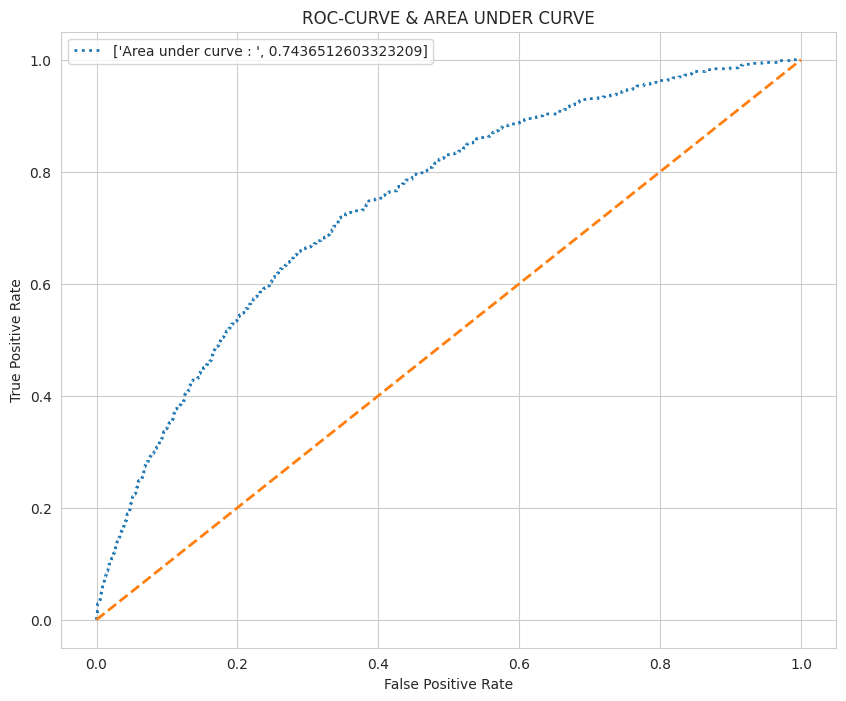

In [145]:
print ("Accuracy score : ", accuracy)
print ("F1 score : ", f1_sc)
print ("AUC : ", auc_score)
print ("classification report :\n", classify_metrics)
    
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)
ax.plot(fpr,tpr,label   = ["Area under curve : ",auc_score],linewidth=2,linestyle="dotted")
ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
plt.legend(loc="best")
plt.title("ROC-CURVE & AREA UNDER CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [146]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

First, examining the top 15 features of the LightGBM model, we can see that it contains a number of features that were created from domain knowledge and through the automated feature engineering (DFS) process. Among the original features, a number of them are those that had a high loan default rate during exploratory data analysis.

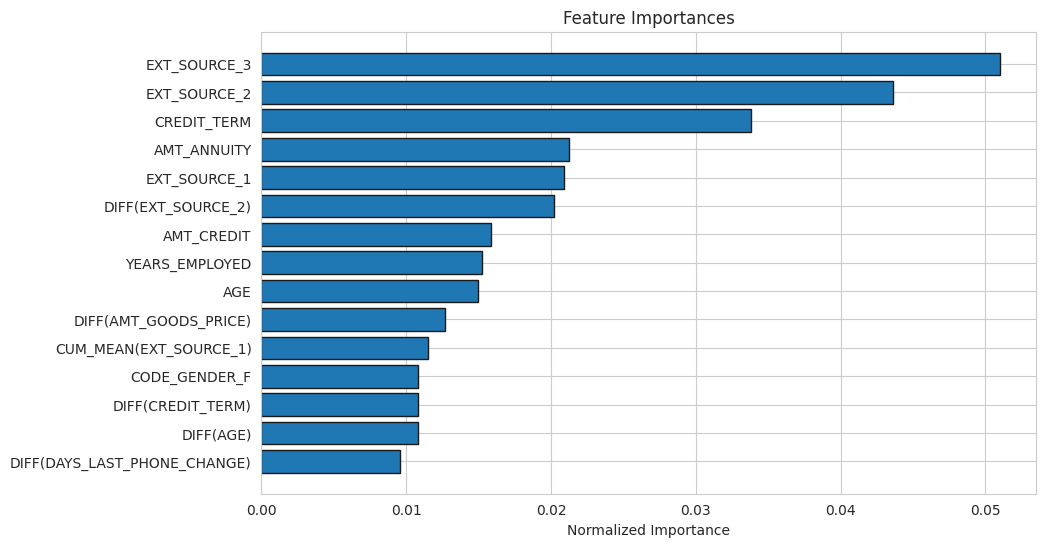

In [147]:
# Show the feature importances for the new features
feature_importances_sorted = plot_feature_importances(feature_importances)

Looking at the top 15 features of the base case model, we can see that it contains a number of features that we saw had a high loan default rate during exploratory data analysis.

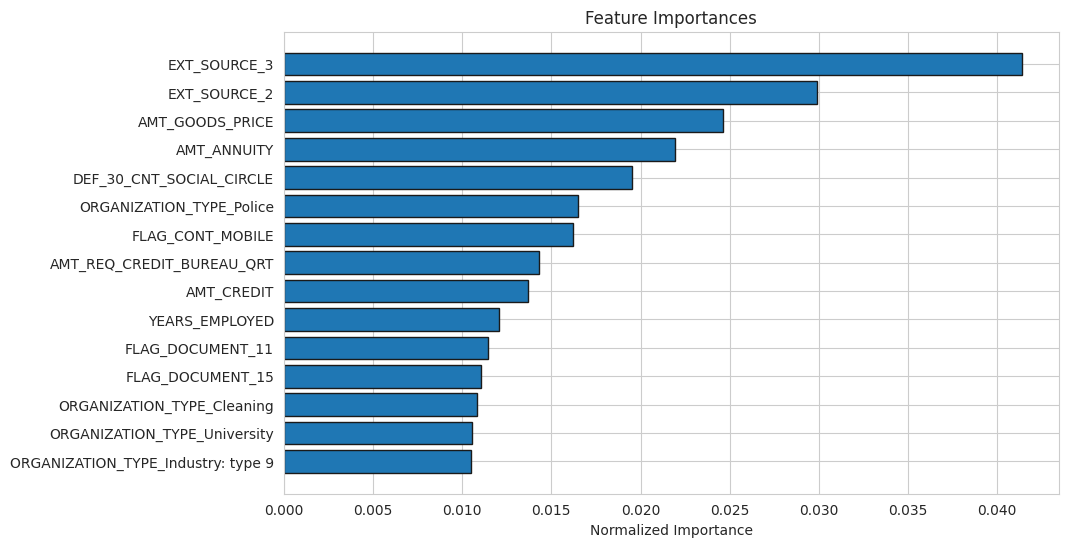

In [148]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances_logit_base)


---

### <b> 5.0 Hyperparameter Tuning </b>

After choosing LightGBM as the binary classifier, we can tune the hyperparameters for improving the model results through grid search, random search, and Bayesian optimization

---

<b> 5.1 Pre-processing </b>

The hyperparameter tuning process needs an objective function, the domain space, optimization algorithm to give the results.

First, the data is prepared for model training.

In [149]:
random.seed(50)

#Remove possible JSON characters
df_undersampled_X = df_undersampled_X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_undersampled_Y = df_undersampled_Y.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test_X = test_X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test_Y = test_Y.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# Create a training and testing dataset
train_set = lgb.Dataset(data = df_undersampled_X, label = df_undersampled_Y)
test_set = lgb.Dataset(data = test_X, label = test_Y)

The domain space is the range of hyperparameters over which the tuning process will be carried out. As seen below there are number of hyperparameters that can be modified. This grid can be used for grid/random search.

In [150]:
# Hyperparameter grid
param_grid = {
    'boosting_type': ['gbdt', 'goss'],
    'num_leaves': list(range(20, 150)),
    'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),
    'subsample_for_bin': list(range(20000, 300000, 20000)),
    'min_child_samples': list(range(20, 500, 5)),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.6, 1, 10)),
    'subsample': list(np.linspace(0.5, 1, 100)),
    'is_unbalance': [True, False]
}

N_FOLDS = 5

The results of the tuning process will can be saved in the following dataframes

In [152]:
MAX_EVALS = 50
# Dataframes for random and grid search
random_results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                              index = list(range(MAX_EVALS)))

grid_results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                              index = list(range(MAX_EVALS)))

The objective function is the one which takes the input hyperparameters to test different models and optimize the values over multiple iterations. The function use cross-validation for each major iteration to minimize the loss (1- ROC AUC score). It also saves the ROC AUC scores, and the hyperparameter values for each iteration, and the function can be used for all 3 methods. 

In [168]:
# Objective function
OUT_FILE = 'hyperParam.csv'
def objective(hyperparameters):
    """Objective function for Gradient Boosting Machine Hyperparameter Optimization.
    """
    
    # Keep track of evals
    global ITERATION
    
    ITERATION += 1
    
    print('current iteration:', ITERATION)
    
    # Using early stopping to find number of trees trained
    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']
    
    if 'subsample' not in hyperparameters:  
    
        # Retrieve the subsample
        subsample = hyperparameters['boosting_type'].get('subsample', 1.0)
    
        # Extract the boosting type and subsample to top level keys
        hyperparameters['boosting_type'] = hyperparameters['boosting_type']['boosting_type']
        hyperparameters['subsample'] = subsample
    
        # Make sure parameters that need to be integers are integers
        for parameter_name in ['num_leaves', 'subsample_for_bin', 'min_child_samples']:
            hyperparameters[parameter_name] = int(hyperparameters[parameter_name])
            

    start = timer()
    
    # Perform n_folds cross validation
    cv_results = lgb.cv(hyperparameters, train_set, num_boost_round = 10000, nfold = N_FOLDS, 
                       callbacks=[
        lgb.early_stopping(stopping_rounds=100),
    ], metrics = 'auc', seed = 50)


    run_time = timer() - start
    
    # Extract the best score
    best_score = cv_results['valid auc-mean'][-1]
    
    # Loss must be minimized
    loss = 1 - best_score
    
    # Boosting rounds that returned the highest cv score
    n_estimators = len(cv_results['valid auc-mean'])
    
    # Add the number of estimators to the hyperparameters
    hyperparameters['n_estimators'] = n_estimators

    # Write to the csv file ('a' means append)
    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, best_score])
    of_connection.close()
    
    # Dictionary with information for evaluation
    dict_return = {'loss': loss, 'hyperparameters': hyperparameters, 'iteration': ITERATION,
            'train_time': run_time, 'score': best_score, 'status': STATUS_OK}

    return dict_return

---

<b> 5.2 Grid Search </b>

The grid search algorithm iterates over the hyperparameters incrementally to explore the entire domain space. However, the exhaustive search is very time consuming and cannot be completed with finite computing resources. 

In [169]:
def grid_search(param_grid, max_evals = MAX_EVALS):
    """Grid search algorithm (with limit on max evals)"""
    
    # Dataframe to store results
    results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                              index = list(range(MAX_EVALS)))
    
    # https://codereview.stackexchange.com/questions/171173/list-all-possible-permutations-from-a-python-dictionary-of-lists
    keys, values = zip(*param_grid.items())
    
    global ITERATION
    
    ITERATION = 0
    
    # Iterate through every possible combination of hyperparameters
    for v in itertools.product(*values):
        
        start = timer()
        
        # Create a hyperparameter dictionary
        hyperparameters = dict(zip(keys, v))
        
        # Set the subsample ratio accounting for boosting type
        hyperparameters['subsample'] = 1.0 if hyperparameters['boosting_type'] == 'goss' else hyperparameters['subsample']
        
        # Evalute the hyperparameters
        
        dict_return = objective(hyperparameters)
        eval_results = at(dict_return, 'score', 'hyperparameters', 'iteration')
           
        results.loc[ITERATION-1, :] = eval_results
        
        run_time = timer() - start
    
        print('run time:', run_time)
        
        # Normally would not limit iterations
        if ITERATION-1 > MAX_EVALS:
            break
       
    # Sort with best score on top
    results.sort_values('score', ascending = False, inplace = True)
    results.reset_index(inplace = True)
    
    return results

The created function can theoretically run on the entire domain space but is limited to maximum of 20 evaluations due to time and computational constraints.

In [170]:
MAX_EVALS = 20

grid_results = grid_search(param_grid)

print('The best validation score was {:.5f}'.format(grid_results.loc[0, 'score']))
print('\nThe best hyperparameters were:')

current iteration: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50831
[LightGBM] [Info] Number of data points in the train set: 4377, number of used features: 397
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012882 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50831
[LightGBM] [Info] Number of data points in the train set: 4377, number of used features: 397
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50831
[LightGBM] [Info] Number of data points in the train set: 4378, number of used features: 397
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009035 seconds.
You c

In [171]:
pprint.pprint(grid_results.loc[0, 'params'])

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.6,
 'is_unbalance': True,
 'learning_rate': 0.004999999999999999,
 'min_child_samples': 20,
 'n_estimators': 771,
 'num_leaves': 20,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 0.5,
 'subsample_for_bin': 20000}


In [172]:
# Get the best grid parameters
grid_best_params = grid_results.loc[0, 'params']

# Create, train, test model
model = lgb.LGBMClassifier(**grid_best_params, random_state = 42)
model.fit(df_undersampled_X, df_undersampled_Y)

preds = model.predict_proba(test_X)[:, 1]

print('The best model from grid search scores {:.5f} ROC AUC on the test set.'.format(roc_auc_score(test_Y, preds)))

[LightGBM] [Info] Number of positive: 1824, number of negative: 3648
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50831
[LightGBM] [Info] Number of data points in the train set: 5472, number of used features: 397
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
The best model from grid search scores 0.74463 ROC AUC on the test set.


The best hyperparameters identified from the limited grid search and the ROC AUC score on test data are as given above